In [1]:

import datetime

# The size of each step in days
day_delta = datetime.timedelta(hours=1)

start_date = datetime.datetime(2017,6,1,0,0)
end_date = start_date + 17300*day_delta

dat = []
for i in range((end_date - start_date).days):
    dat.append(start_date + i*day_delta);
    print(start_date + i*day_delta)

2017-06-01 00:00:00
2017-06-01 01:00:00
2017-06-01 02:00:00
2017-06-01 03:00:00
2017-06-01 04:00:00
2017-06-01 05:00:00
2017-06-01 06:00:00
2017-06-01 07:00:00
2017-06-01 08:00:00
2017-06-01 09:00:00
2017-06-01 10:00:00
2017-06-01 11:00:00
2017-06-01 12:00:00
2017-06-01 13:00:00
2017-06-01 14:00:00
2017-06-01 15:00:00
2017-06-01 16:00:00
2017-06-01 17:00:00
2017-06-01 18:00:00
2017-06-01 19:00:00
2017-06-01 20:00:00
2017-06-01 21:00:00
2017-06-01 22:00:00
2017-06-01 23:00:00
2017-06-02 00:00:00
2017-06-02 01:00:00
2017-06-02 02:00:00
2017-06-02 03:00:00
2017-06-02 04:00:00
2017-06-02 05:00:00
2017-06-02 06:00:00
2017-06-02 07:00:00
2017-06-02 08:00:00
2017-06-02 09:00:00
2017-06-02 10:00:00
2017-06-02 11:00:00
2017-06-02 12:00:00
2017-06-02 13:00:00
2017-06-02 14:00:00
2017-06-02 15:00:00
2017-06-02 16:00:00
2017-06-02 17:00:00
2017-06-02 18:00:00
2017-06-02 19:00:00
2017-06-02 20:00:00
2017-06-02 21:00:00
2017-06-02 22:00:00
2017-06-02 23:00:00
2017-06-03 00:00:00
2017-06-03 01:00:00


In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
%run f2forecast.py

In [4]:
df=pd.read_excel("DATwithDay.xlsx")
df.head()

,t,Потребл.эн,Ставка,Data
0,1,13.176,1600.03,2017-06-01 00:00:00
1,2,15.408,1724.33,2017-06-01 01:00:00
2,3,19.488,1783.36,2017-06-01 02:00:00
3,4,19.176,1758.90,2017-06-01 03:00:00
4,5,19.176,1788.47,2017-06-01 04:00:00


In [5]:
ConsWith = []
Stav = []
WorkOrHolid = []

for i in range(len(df["Ставка"])):
    ConsWith.append(df['Потребл.эн'][i])
    Stav.append(df['Ставка'][i])
    if((i<47) or (96<i<216) or (264<i<384) or (432<i<552) or (600<i<700)):
        WorkOrHolid.append(1)
    else:
        WorkOrHolid.append(0)
#print(df['Data'][264:384])

#Cons without holiyday
FirstWeek = ConsWith[0:47];
#WeekendsFirstWeek = [48:97];
SecondWeek = ConsWith[96:216];
#WeekendsSecondWeek = [217:263];
ThirdWeek = ConsWith[264:384];
#WeekendsThirdWeek = [385:431];
FourWeek = ConsWith[432:552];
#WeekendsFourWeek = [553:559];
LastWeek = ConsWith[600:720];
Cons = FirstWeek + SecondWeek + ThirdWeek + FourWeek + LastWeek;
print(len(WorkOrHolid))

720


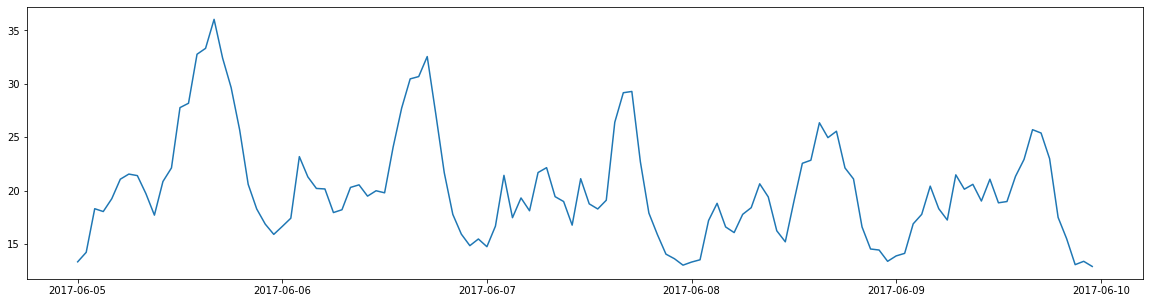

In [6]:
plt.figure(figsize=(20,5))
data=df['Data'][96:216]
plt.plot(data,SecondWeek)

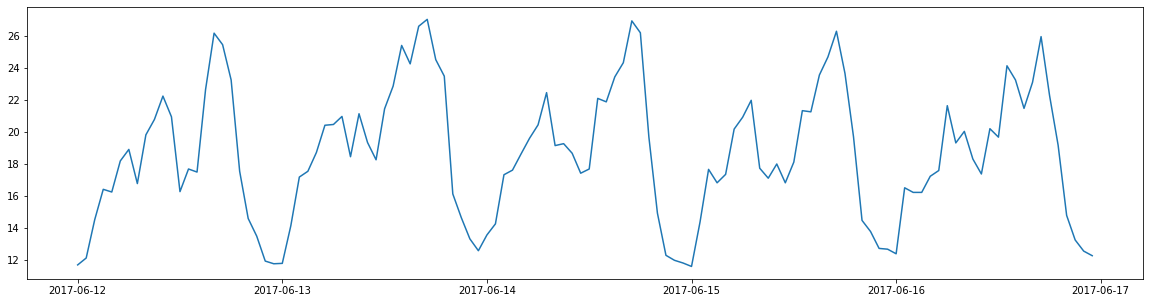

In [7]:
plt.figure(figsize=(20,5))
data=df['Data'][264:384]
plt.plot(data,ThirdWeek)

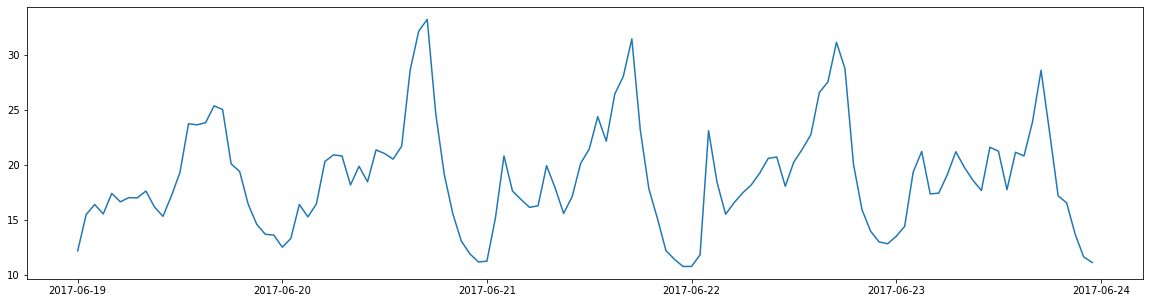

In [8]:
plt.figure(figsize=(20,5))
data=df['Data'][432:552]
plt.plot(data,FourWeek)

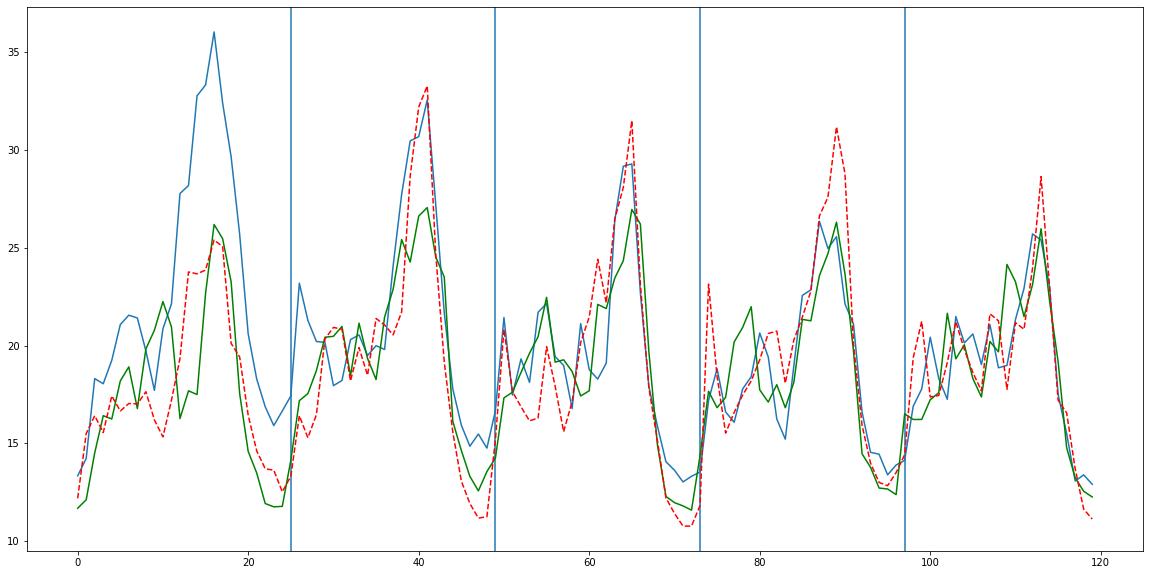

In [9]:
plt.figure(figsize=(20,10))
plt.axvline(x=25)
plt.axvline(x=49)
plt.axvline(x=73)
plt.axvline(x=97)
plt.plot(SecondWeek)
plt.plot(ThirdWeek,'g')
plt.plot(FourWeek,'--r')

In [10]:
SecondWeekM = SecondWeek[0:25]
ThirdWeekM = ThirdWeek[0:25]
FourWeekM = FourWeek[0:25]

SecondWeekTU = SecondWeek[25:49]
ThirdWeekTU = ThirdWeek[25:49]
FourWeekTU = FourWeek[25:49]

SecondWeekTW = SecondWeek[49:73]
ThirdWeekTW = ThirdWeek[49:73]
FourWeekTW = FourWeek[49:73]

SecondWeekTH = SecondWeek[73:97]
ThirdWeekTH = ThirdWeek[73:97]
FourWeekTH = FourWeek[73:97]

SecondWeekFR = SecondWeek[97:120]
ThirdWeekFR = ThirdWeek[97:120]
FourWeekFR = FourWeek[97:120]


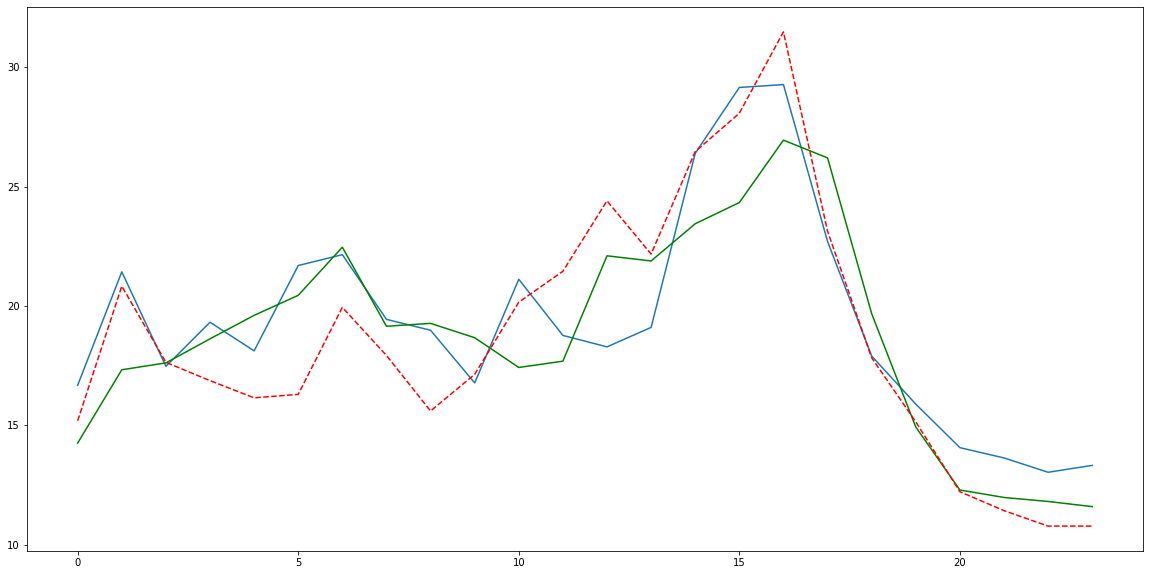

In [11]:
plt.figure(figsize=(20,10))

plt.plot(SecondWeekTW)
plt.plot(ThirdWeekTW,'g')
plt.plot(FourWeekTW,'--r')

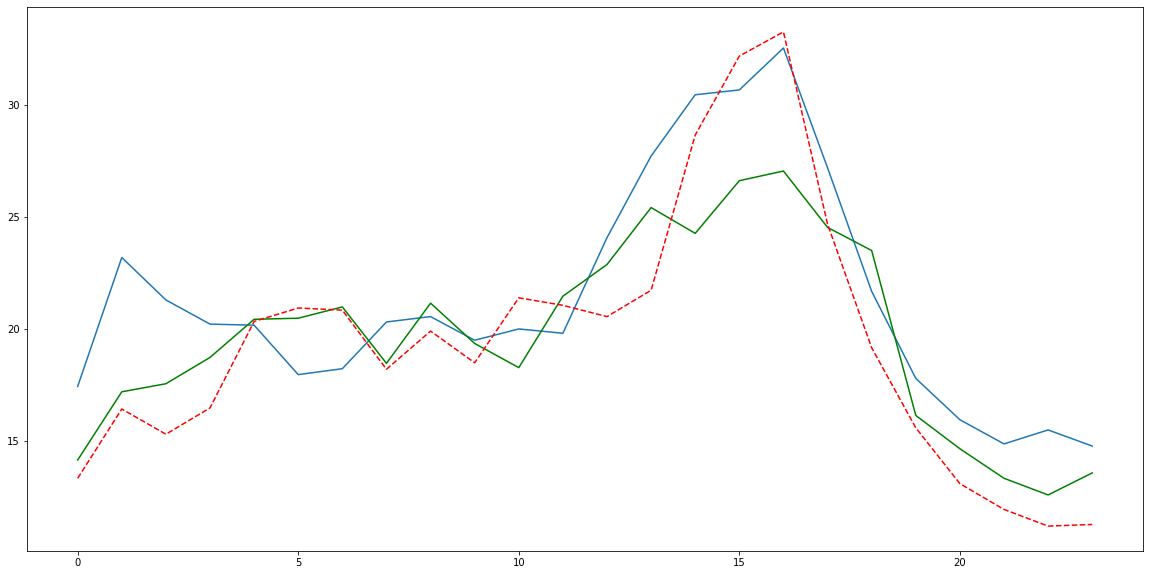

In [12]:
plt.figure(figsize=(20,10))

plt.plot(SecondWeekTU)
plt.plot(ThirdWeekTU,'g')
plt.plot(FourWeekTU,'--r')

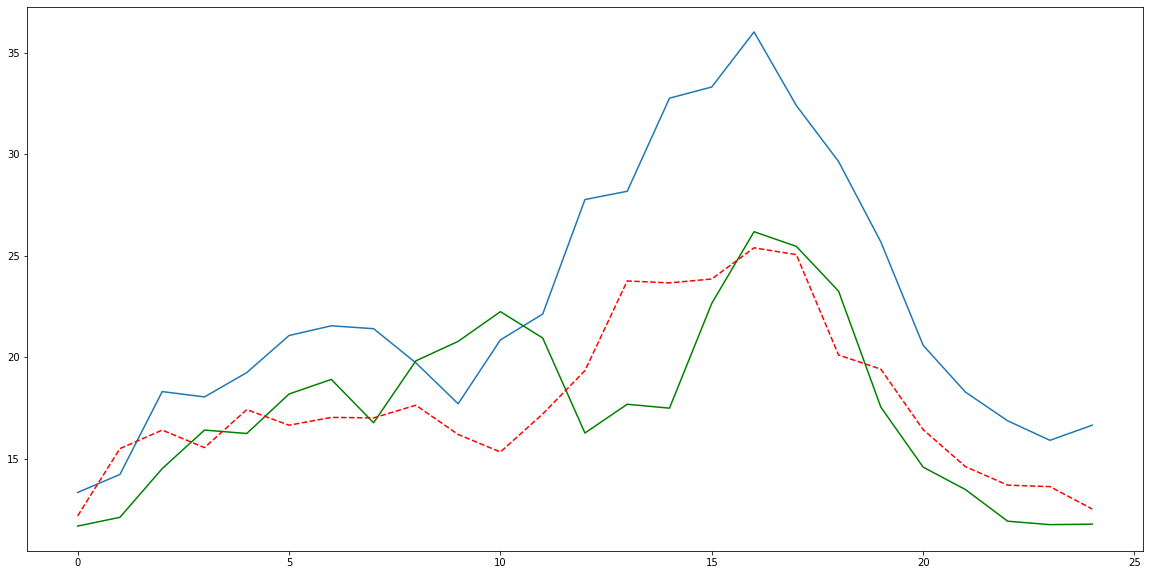

In [13]:
plt.figure(figsize=(20,10))

plt.plot(SecondWeekM)
plt.plot(ThirdWeekM,'g')
plt.plot(FourWeekM,'--r')

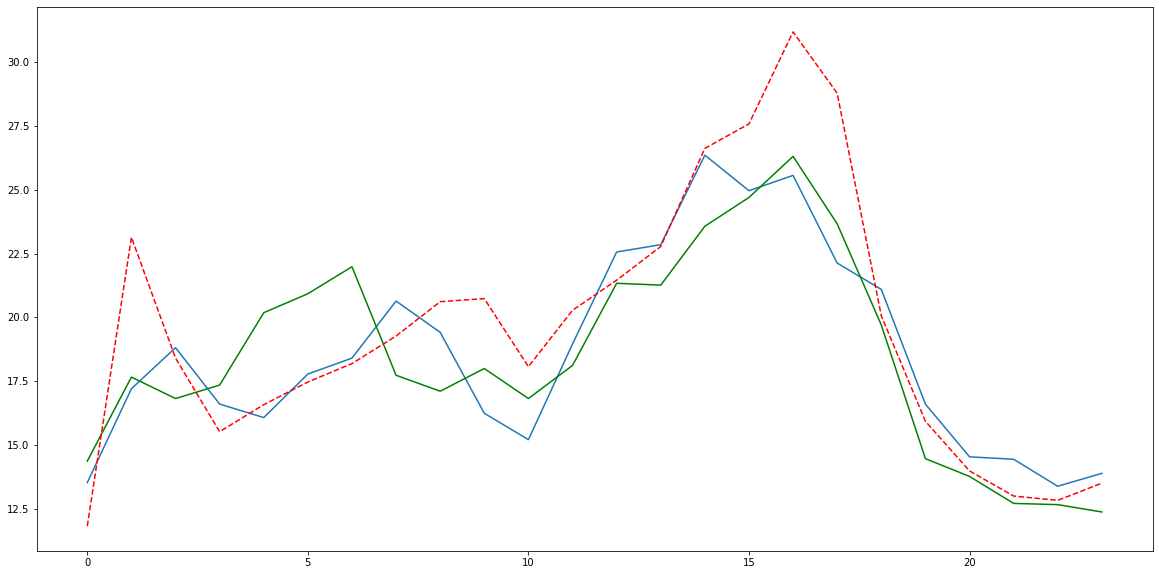

In [14]:
plt.figure(figsize=(20,10))

plt.plot(SecondWeekTH)
plt.plot(ThirdWeekTH,'g')
plt.plot(FourWeekTH,'--r')

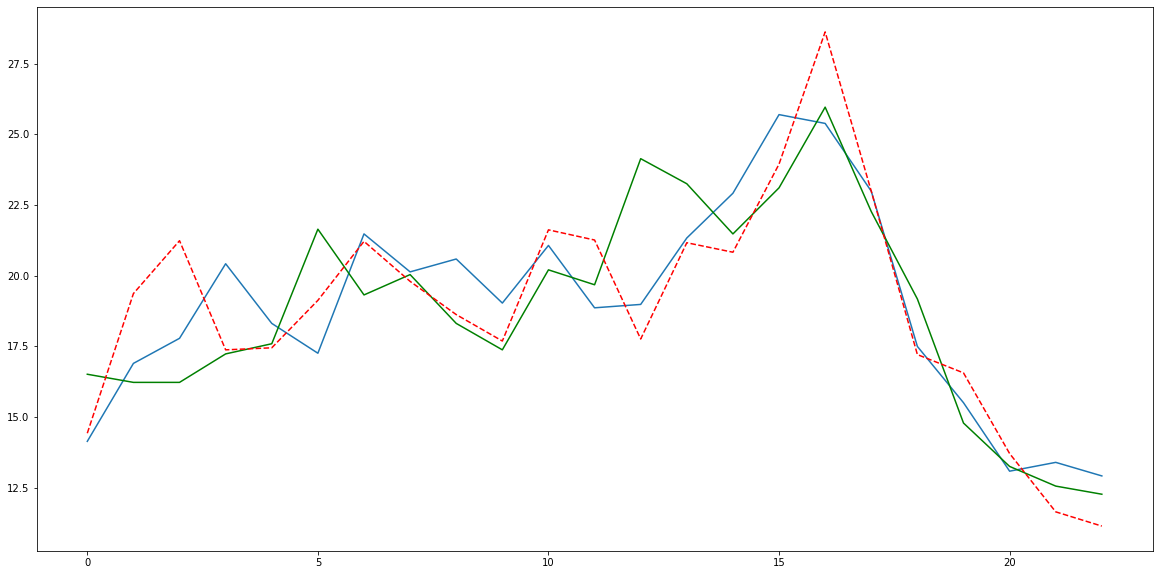

In [15]:
plt.figure(figsize=(20,10))

plt.plot(SecondWeekFR)
plt.plot(ThirdWeekFR,'g')
plt.plot(FourWeekFR,'--r')

<h1>Ставка тарифа</h1>

In [16]:

Stav = []
for i in range(len(df["Ставка"])):
    
    Stav.append(df['Ставка'][i])


#Stav without holiyday
FirstWeekS = Stav[0:47];
SecondWeekS = Stav[96:216];
ThirdWeekS = Stav[264:384];
FourWeekS = Stav[432:552];
LastWeekS = Stav[600:720];
ConsS = FirstWeekS + SecondWeekS + ThirdWeekS + FourWeekS + LastWeekS;

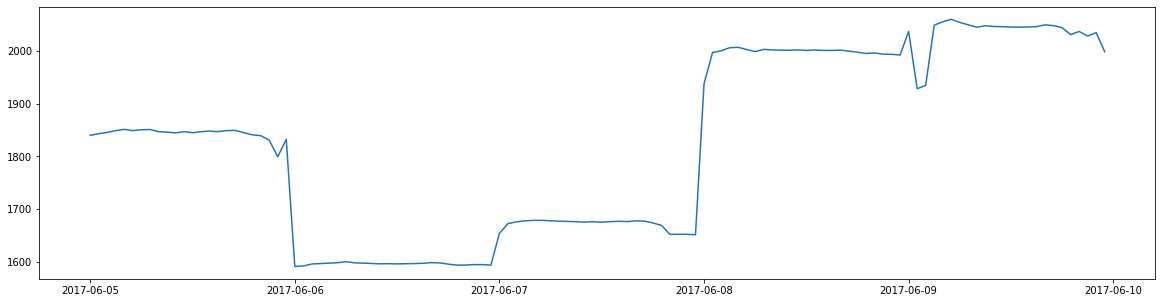

In [17]:
plt.figure(figsize=(20,5))
data=df['Data'][96:216]
plt.plot(data,SecondWeekS)

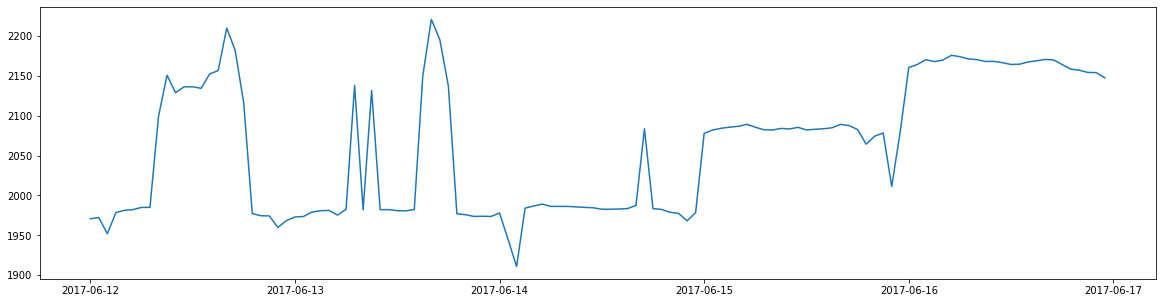

In [18]:
plt.figure(figsize=(20,5))
data=df['Data'][264:384]
plt.plot(data,ThirdWeekS)

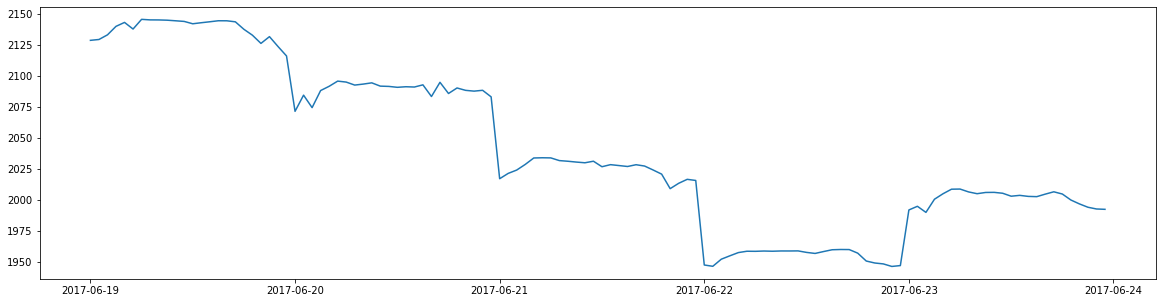

In [19]:
plt.figure(figsize=(20,5))
data=df['Data'][432:552]
plt.plot(data,FourWeekS)

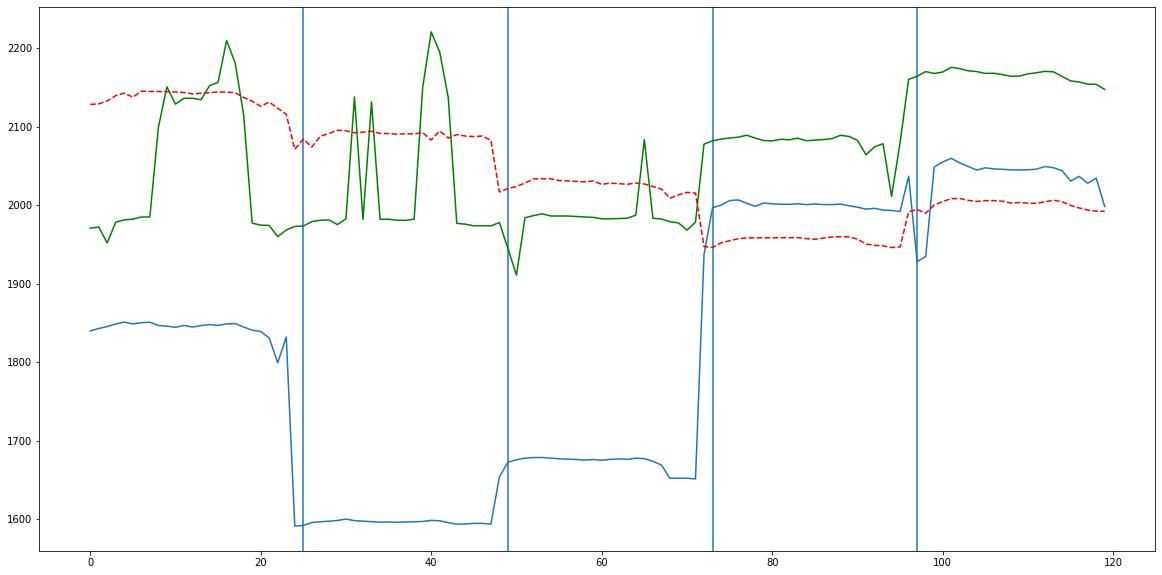

In [20]:
plt.figure(figsize=(20,10))
plt.axvline(x=25)
plt.axvline(x=49)
plt.axvline(x=73)
plt.axvline(x=97)
plt.plot(SecondWeekS)
plt.plot(ThirdWeekS,'g')
plt.plot(FourWeekS,'--r')

In [21]:
SecondWeekMS = SecondWeekS[0:25]
ThirdWeekMS = ThirdWeekS[0:25]
FourWeekMS = FourWeekS[0:25]

SecondWeekTUS = SecondWeekS[25:49]
ThirdWeekTUS = ThirdWeekS[25:49]
FourWeekTUS = FourWeekS[25:49]

SecondWeekTWS = SecondWeekS[49:73]
ThirdWeekTWS = ThirdWeekS[49:73]
FourWeekTWS = FourWeekS[49:73]

SecondWeekTHS = SecondWeekS[73:97]
ThirdWeekTHS = ThirdWeekS[73:97]
FourWeekTHS = FourWeekS[73:97]

SecondWeekFRS = SecondWeekS[97:120]
ThirdWeekFRS = ThirdWeekS[97:120]
FourWeekFRS = FourWeekS[97:120]

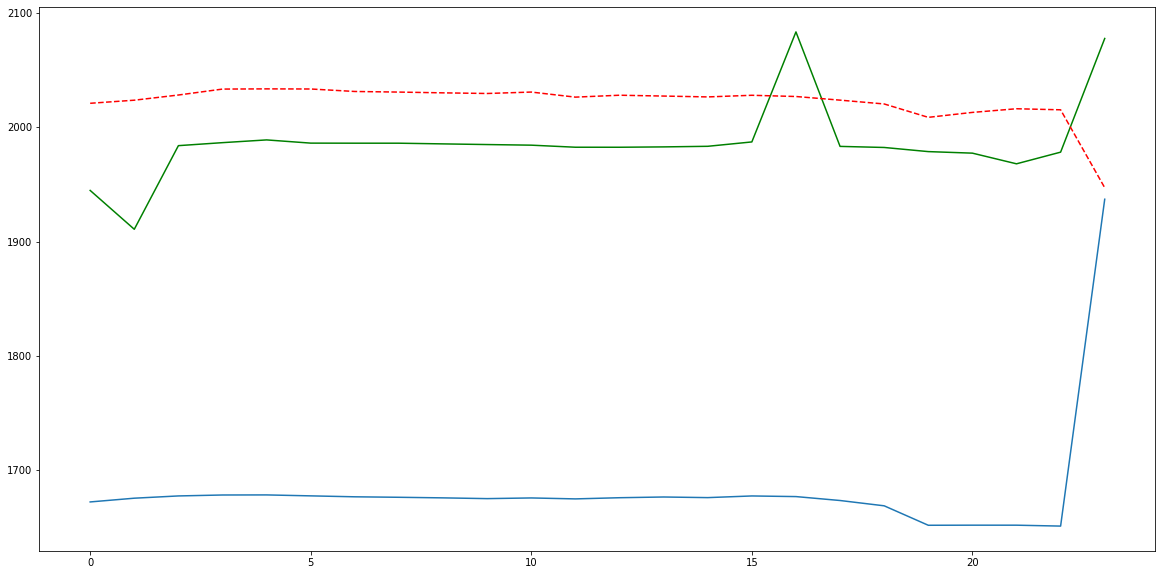

In [22]:
plt.figure(figsize=(20,10))

plt.plot(SecondWeekTWS)
plt.plot(ThirdWeekTWS,'g')
plt.plot(FourWeekTWS,'--r')

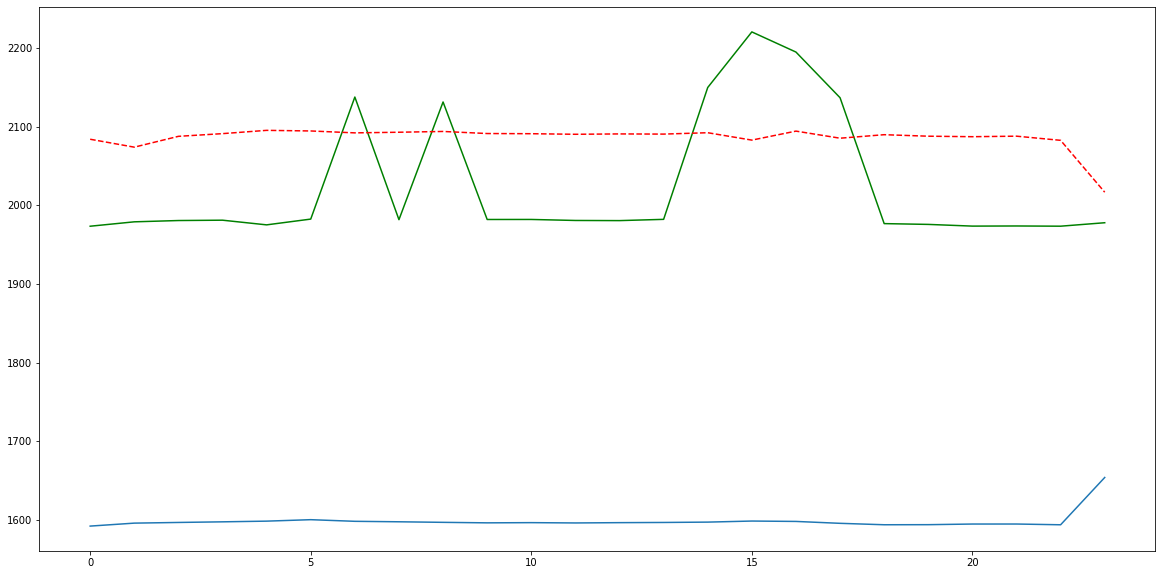

In [23]:
plt.figure(figsize=(20,10))

plt.plot(SecondWeekTUS)
plt.plot(ThirdWeekTUS,'g')
plt.plot(FourWeekTUS,'--r')

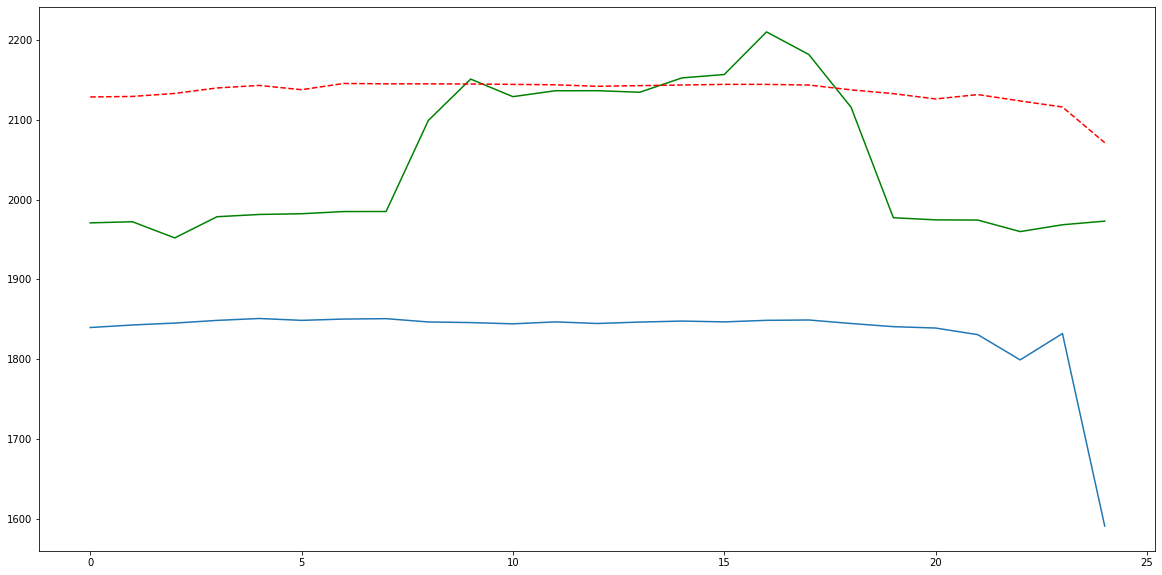

In [24]:
plt.figure(figsize=(20,10))

plt.plot(SecondWeekMS)
plt.plot(ThirdWeekMS,'g')
plt.plot(FourWeekMS,'--r')

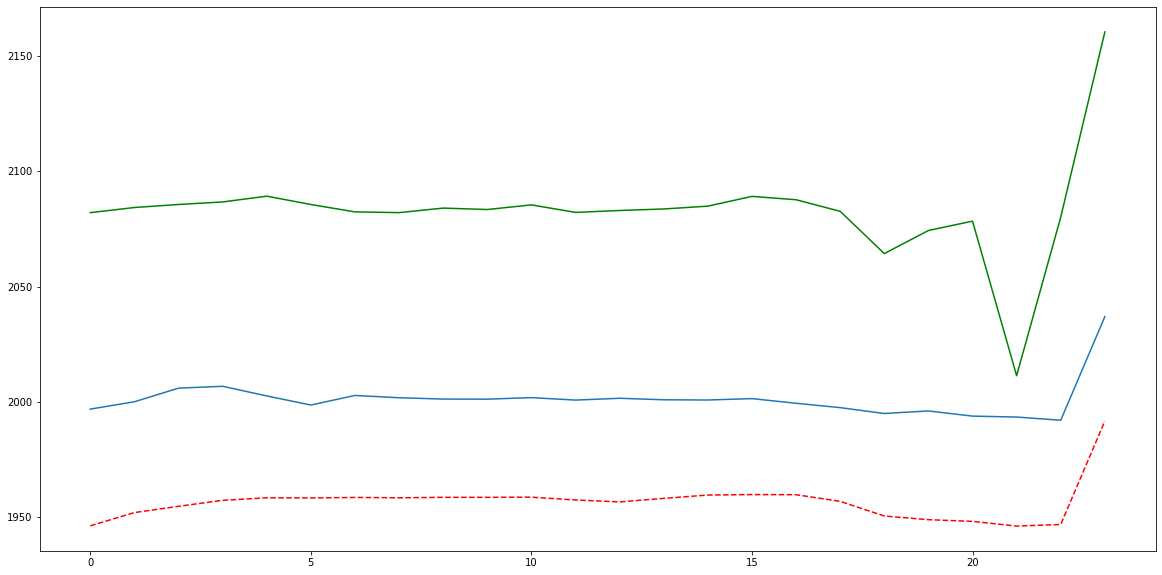

In [25]:
plt.figure(figsize=(20,10))

plt.plot(SecondWeekTHS)
plt.plot(ThirdWeekTHS,'g')
plt.plot(FourWeekTHS,'--r')

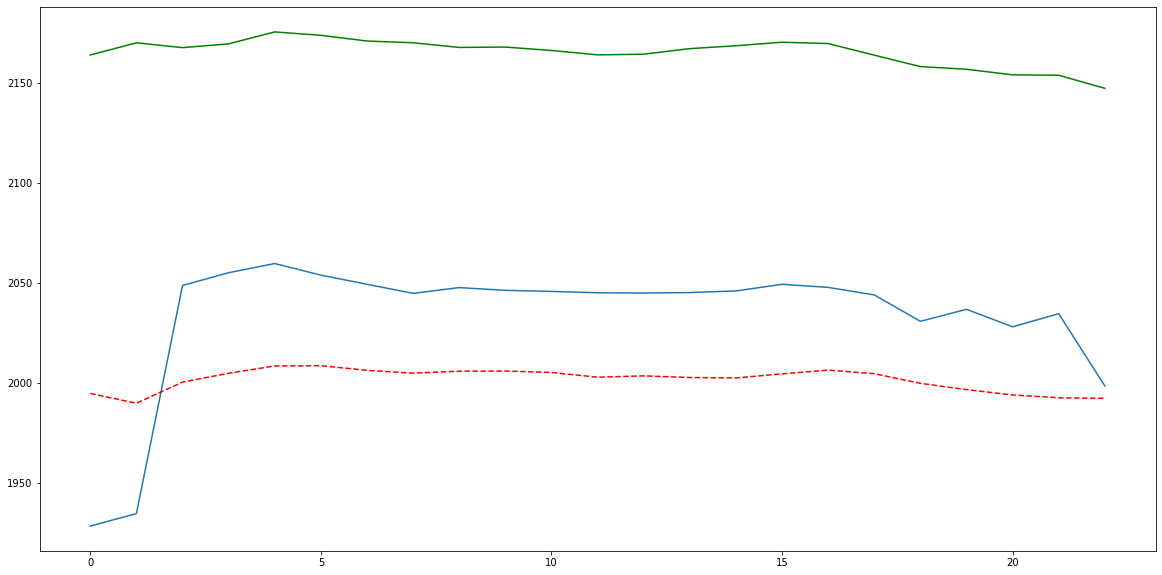

In [26]:
plt.figure(figsize=(20,10))

plt.plot(SecondWeekFRS)
plt.plot(ThirdWeekFRS,'g')
plt.plot(FourWeekFRS,'--r')

<h1>Найдем максимальное значение Потребления и Ставки</h1>

In [27]:
df['Потребл.эн'].describe()

count    720.000000
mean      18.694600
std        4.498866
min       10.728000
25%       15.480000
50%       18.372000
75%       21.300000
max       36.024000
Name: Потребл.эн, dtype: float64

In [28]:
df['Ставка'].describe()

count     720.000000
mean     1982.648125
std       144.151787
min      1591.140000
25%      1933.872500
50%      1996.625000
75%      2090.192500
max      2220.870000
Name: Ставка, dtype: float64

In [29]:
MaxCons = max(ConsWith)
MinCons = min(ConsWith)

print("Максимум Потребления: ")
print(max(ConsWith))
print(df['Data'][int(ConsWith.index(MaxCons))])

print("Минимум Потребления: ")
print(min(ConsWith))
print(df['Data'][int(ConsWith.index(MinCons))])

Максимум Потребления: 
36.024
2017-06-05 16:00:00
Минимум Потребления: 
10.728
2017-06-24 00:00:00


In [30]:
MaxStav = max(Stav)
MinStav = min(Stav)

print("Максимум Ставки: ")
print(max(Stav))
print(df['Data'][int(Stav.index(MaxStav))])

print("Минимум Cтавки: ")
print(min(Stav))
print(df['Data'][int(Stav.index(MinStav))])

Максимум Ставки: 
2220.87
2017-06-13 16:00:00
Минимум Cтавки: 
1591.1399999999999
2017-06-06 00:00:00


In [31]:
print(Stav.index(MaxStav))
print(Stav.index(MinStav))


304
120


In [32]:
MaxConsDay = ConsWith[112-16:112+8]
MinConsDay = ConsWith[552:552+24]

MaxStavDay = Stav[304-16:304+8]
MinStavDay = Stav[120:120+24]
print(len(MinStavDay))


24


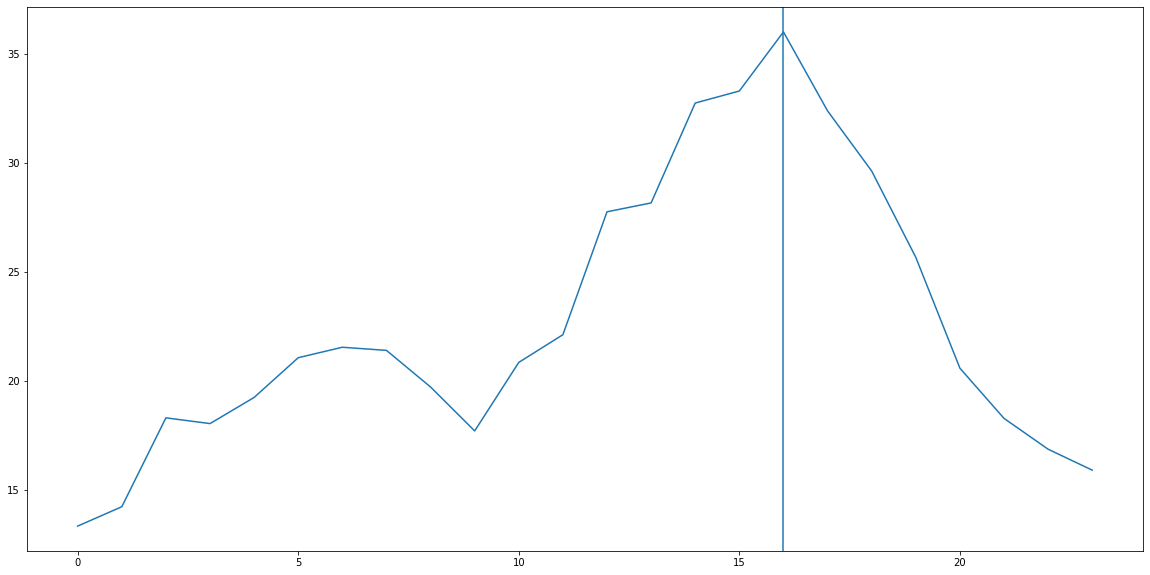

In [33]:
#Построим графики Потребления вместе со ставкой в максимальные и минимальные дни
plt.figure(figsize=(20,10))
plt.axvline(x=16)
plt.plot(MaxConsDay)



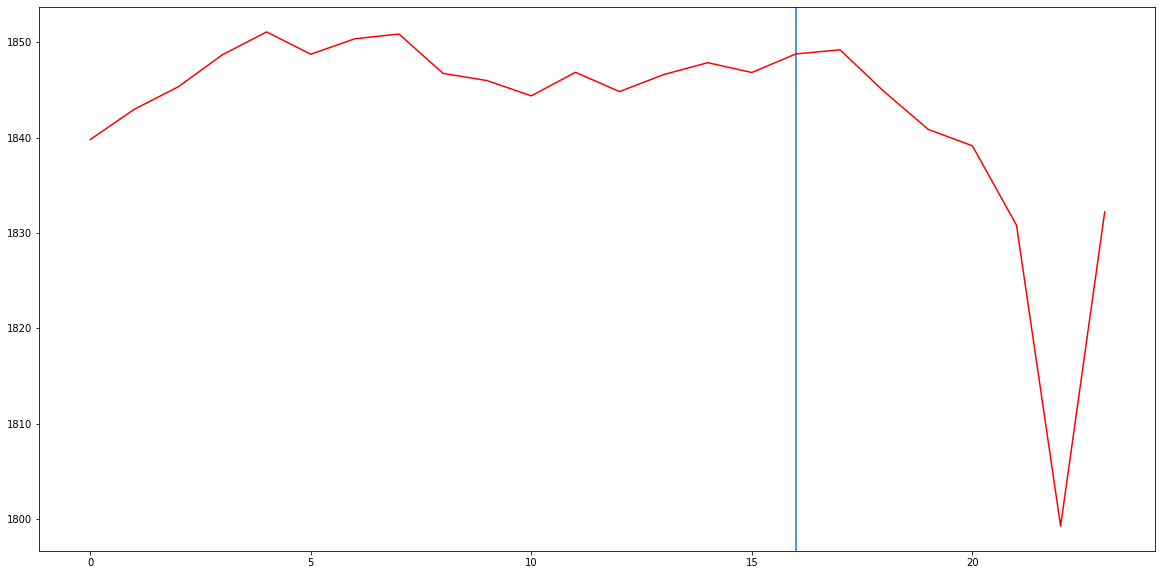

In [34]:
plt.figure(figsize=(20,10))
plt.axvline(x=16)
plt.plot(Stav[112-16:112+8],'r')

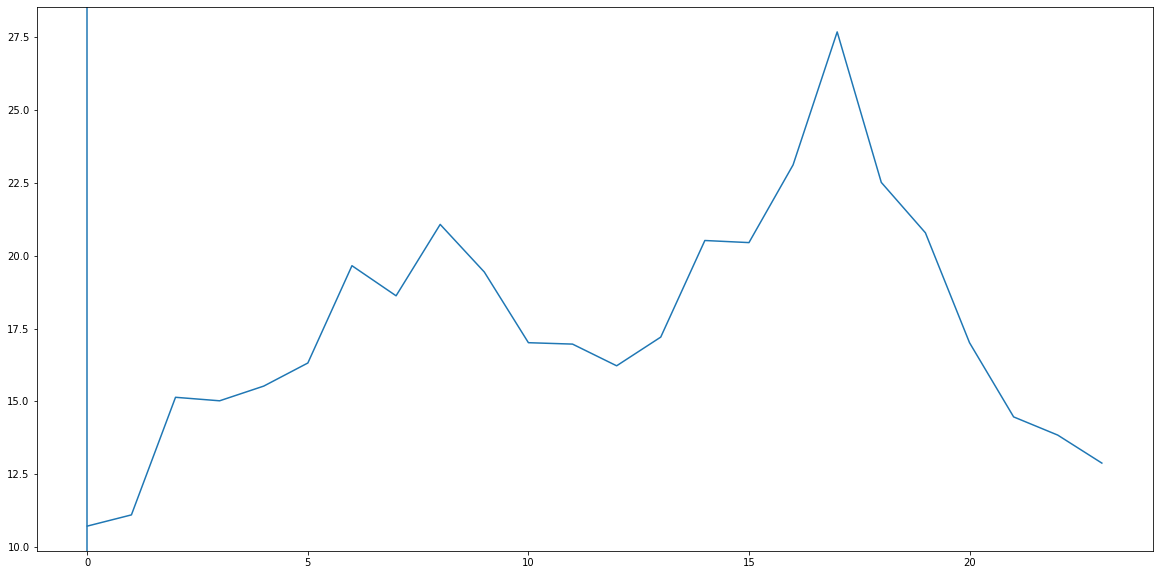

In [35]:
#Построим графики Потребления вместе со ставкой в максимальные и минимальные дни
plt.figure(figsize=(20,10))
plt.axvline(x=0)
plt.plot(MinConsDay)


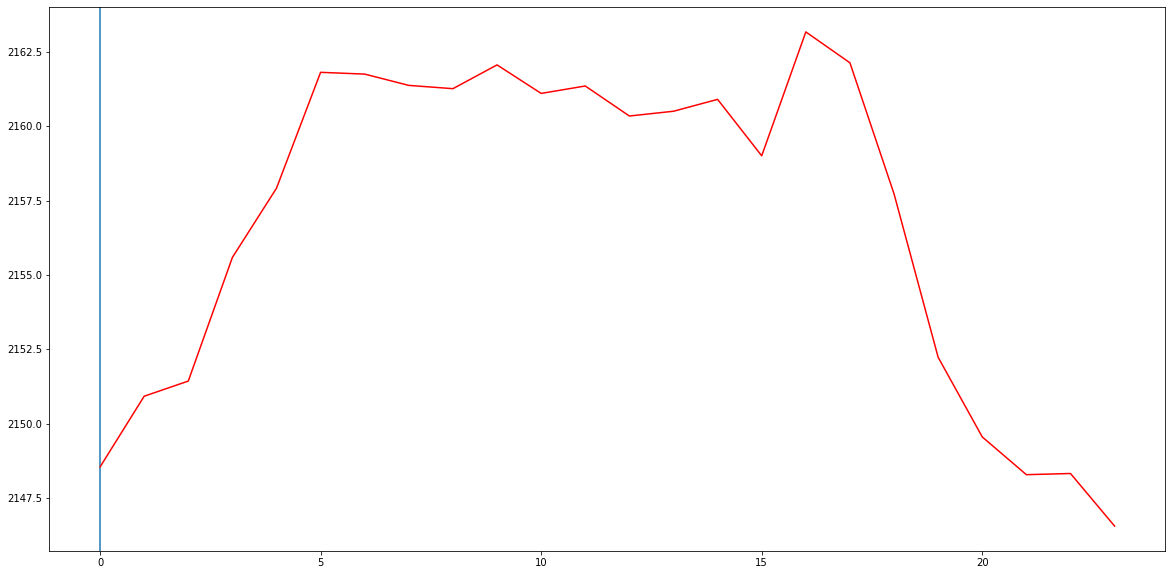

In [36]:
plt.figure(figsize=(20,10))
plt.axvline(x=0)
plt.plot(Stav[552:552+24],'r')

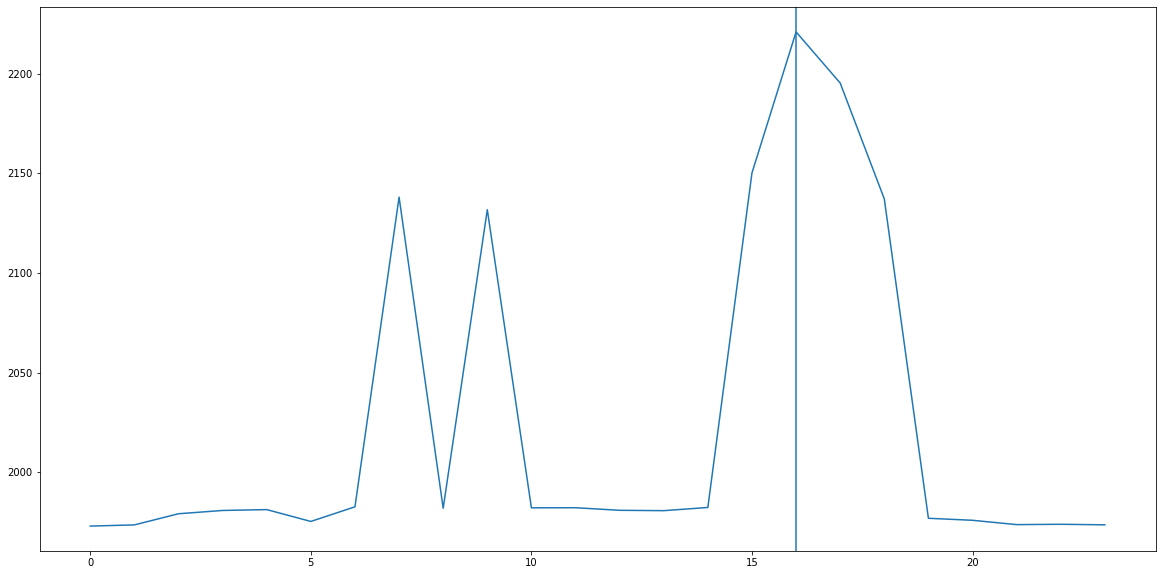

In [37]:
#Рассмотрим поведение потребления, когда ставка максимальна / минимальна
#Построим графики Потребления вместе со ставкой в максимальные и минимальные дни
plt.figure(figsize=(20,10))
plt.axvline(x=16)
plt.plot(MaxStavDay)


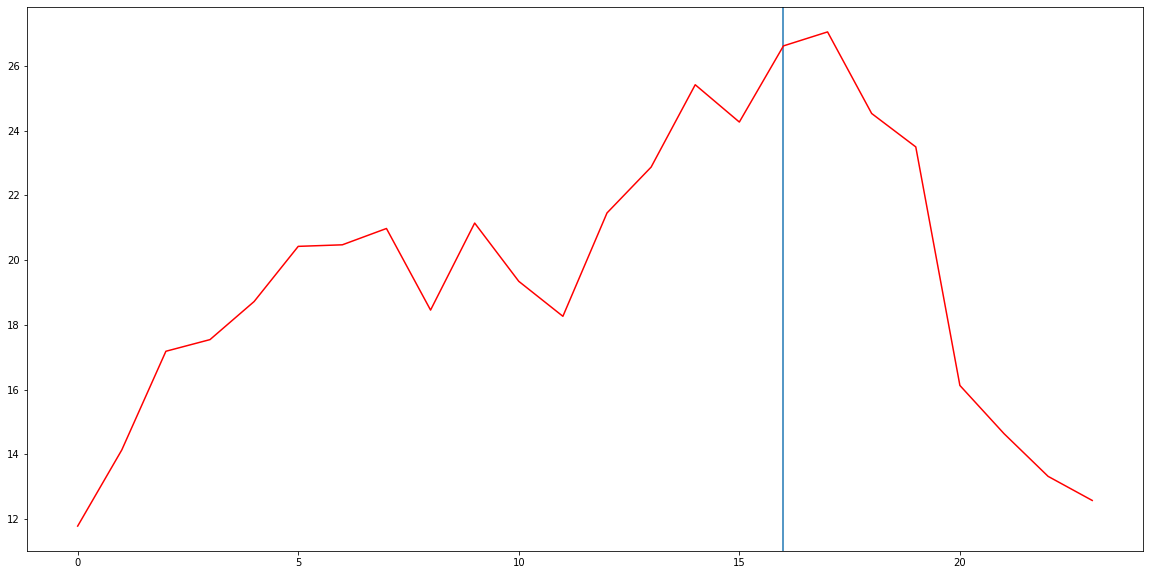

In [38]:
plt.figure(figsize=(20,10))
plt.axvline(x=16)
plt.plot(ConsWith[304-16:304+8],"r")

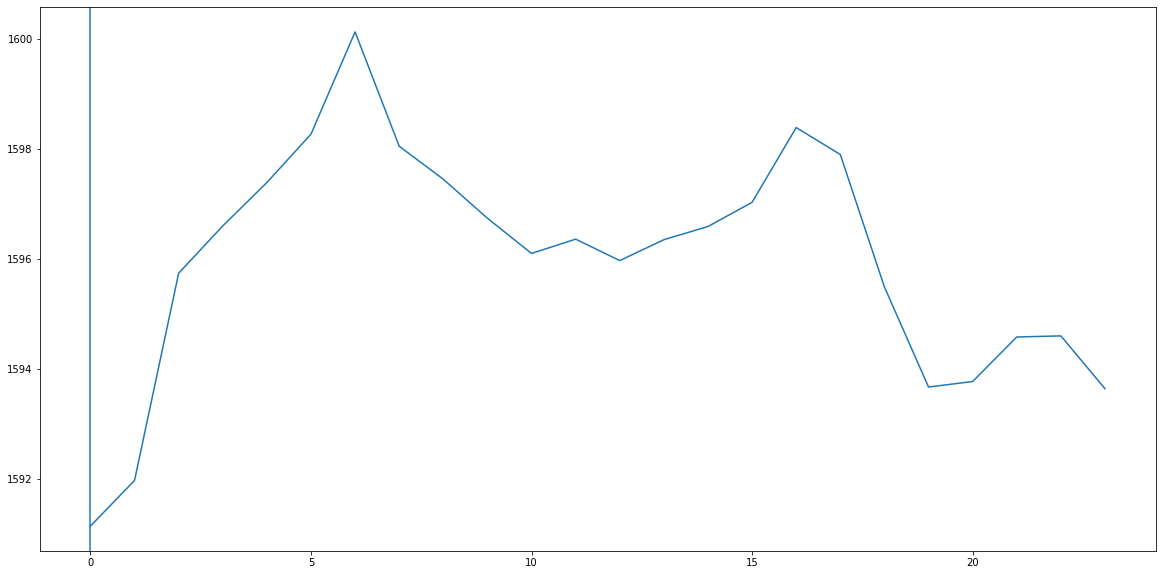

In [39]:
plt.figure(figsize=(20,10))
plt.axvline(x=0)
plt.plot(MinStavDay)

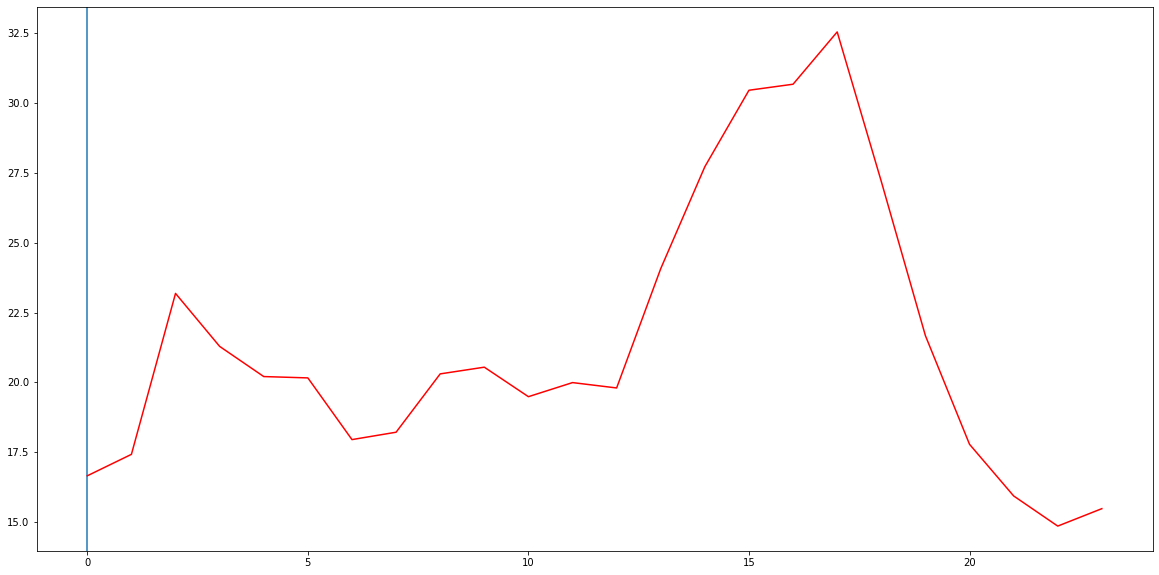

In [40]:
plt.figure(figsize=(20,10))
plt.axvline(x=0)
plt.plot(ConsWith[120:120+24],"r")


<h1>Температура</h1>


In [41]:
df_tp=pd.read_excel("Temp.xlsx")
df_tp.head()

,n,T
0,NaN,11.4
1,NaN,10.5
2,NaN,11.9
3,NaN,14.3
4,NaN,13.9


In [42]:
Temp=[]
for i in range(len(df_tp['T'])):
    Temp.append(df_tp['T'][i])
    Temp.append(df_tp['T'][i])
    Temp.append(df_tp['T'][i])
print(len(Temp))
   




720


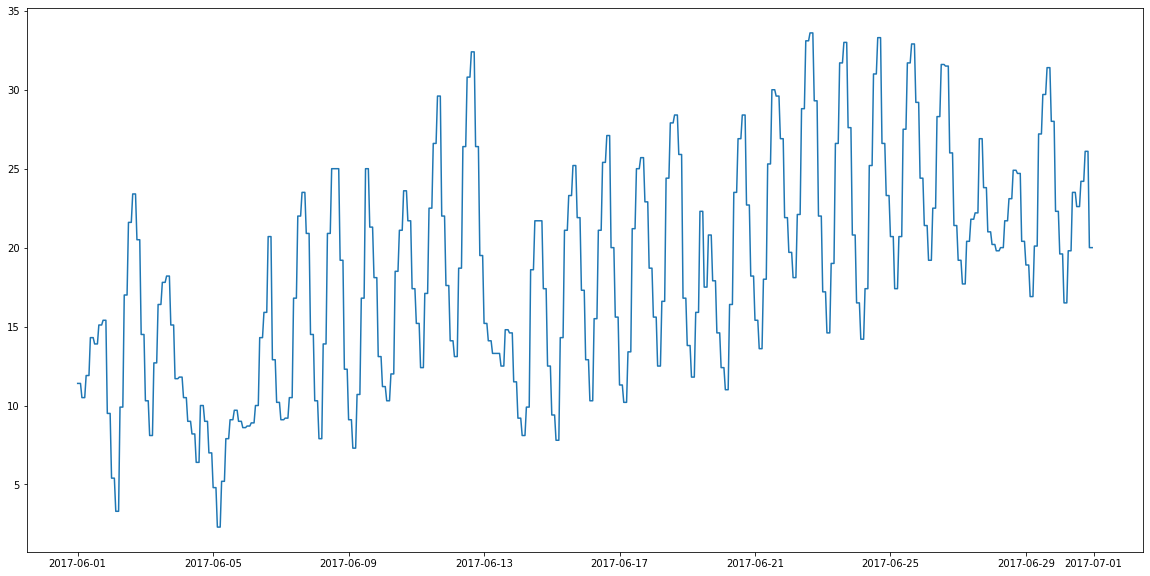

In [43]:
plt.figure(figsize=(20,10))
data=df['Data']
plt.plot(data,Temp)

In [44]:
df_tp['T'].describe()

count    240.000000
mean      18.475833
std        6.973092
min        2.300000
25%       12.900000
50%       18.350000
75%       23.325000
max       33.600000
Name: T, dtype: float64

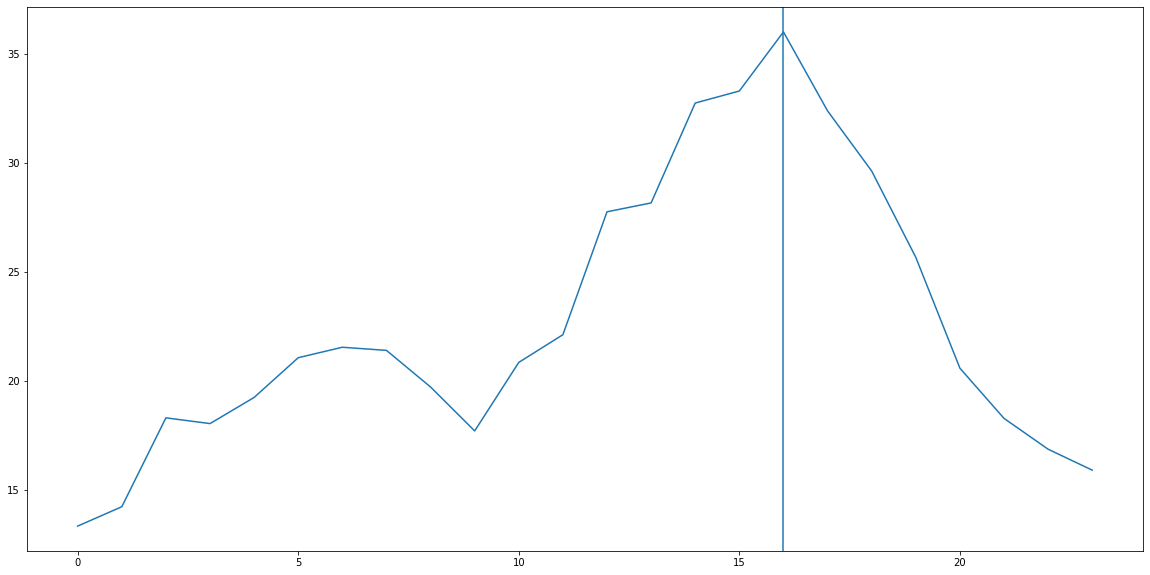

In [45]:
#Построим графики Потребления вместе со ставкой в максимальные и минимальные дни
plt.figure(figsize=(20,10))
plt.axvline(x=16)
plt.plot(MaxConsDay)

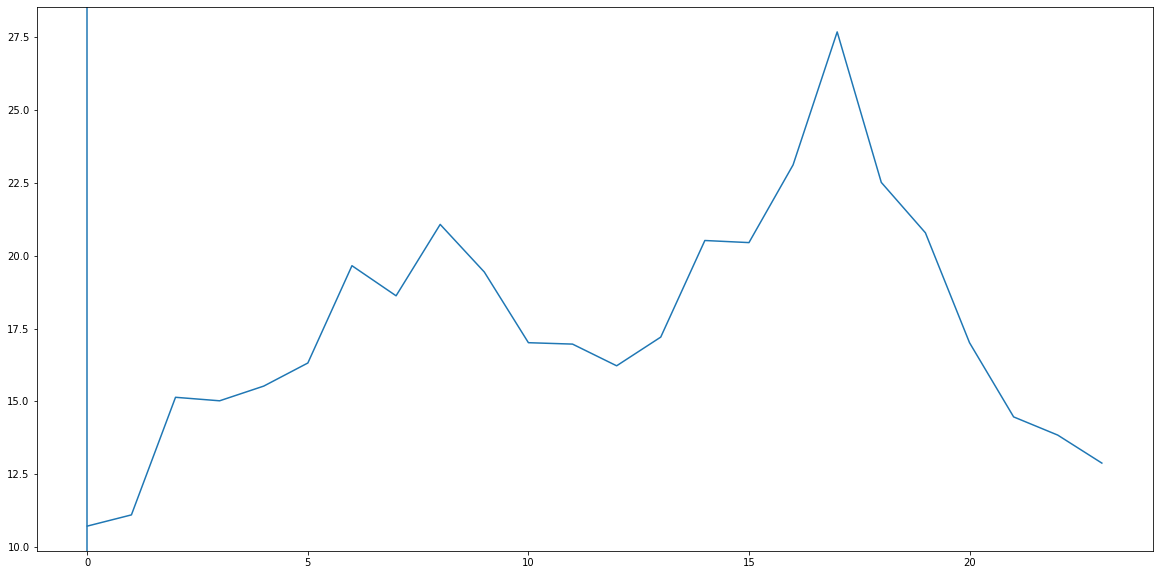

In [46]:
#Построим графики Потребления вместе со ставкой в максимальные и минимальные дни
plt.figure(figsize=(20,10))
plt.axvline(x=0)
plt.plot(MinConsDay)

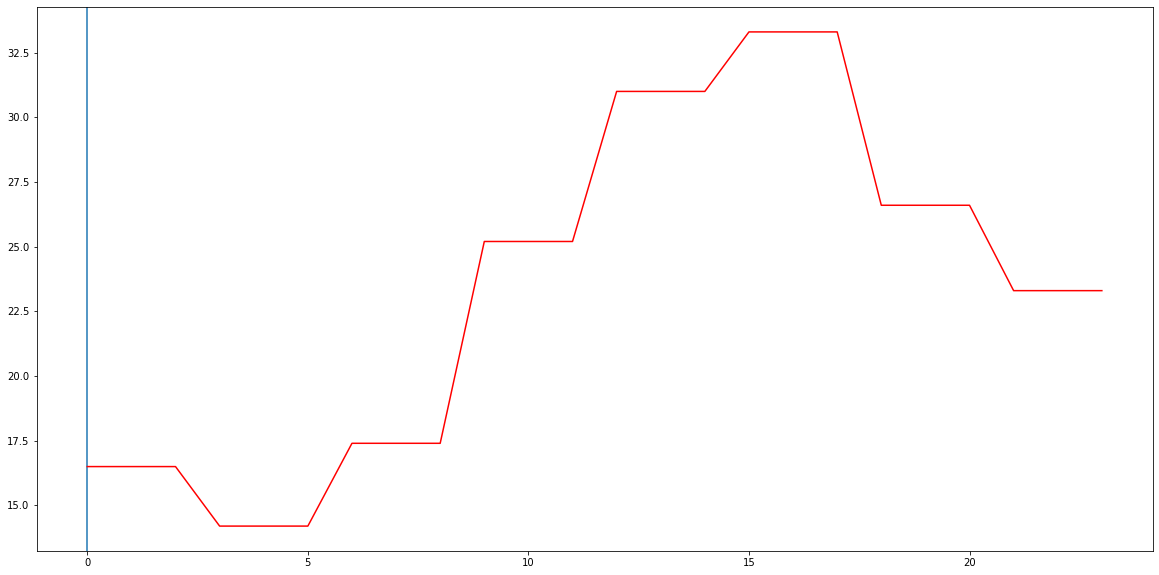

In [47]:
plt.figure(figsize=(20,10))
plt.axvline(x=0)
plt.plot(Temp[552:552+24],'r')

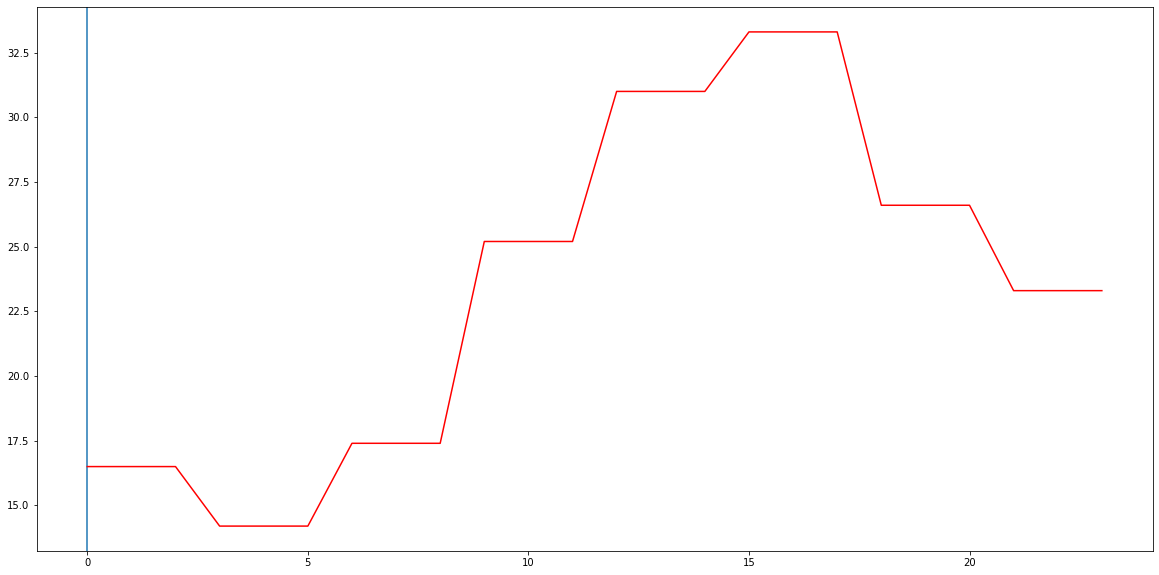

In [48]:
plt.figure(figsize=(20,10))
plt.axvline(x=0)
plt.plot(Temp[552:552+24],'r')

<h1>Анализ2</h1>


In [49]:
df=pd.read_excel("DATwithDay.xlsx",index_col="Data", parse_dates=True, squeeze=True)
df['Потребл.эн'].describe()

count    720.000000
mean      18.694600
std        4.498866
min       10.728000
25%       15.480000
50%       18.372000
75%       21.300000
max       36.024000
Name: Потребл.эн, dtype: float64

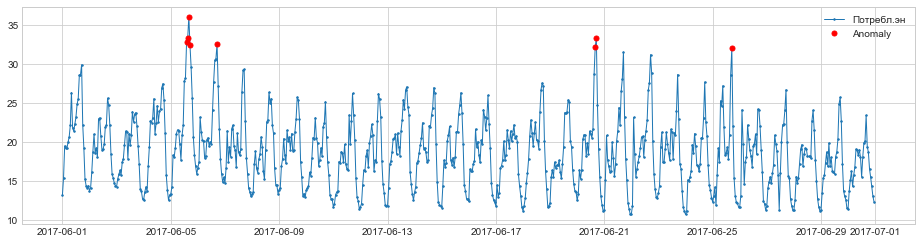

In [50]:
threshold_ad = ThresholdAD(high=32, low=10)
anomalies = threshold_ad.detect(df['Потребл.эн'])
plot(df['Потребл.эн'], anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

In [51]:
anomalies[anomalies]

Data
2017-06-05 14:00:00    True
2017-06-05 15:00:00    True
2017-06-05 16:00:00    True
2017-06-05 17:00:00    True
2017-06-06 17:00:00    True
2017-06-20 16:00:00    True
2017-06-20 17:00:00    True
2017-06-25 17:00:00    True
Name: Потребл.эн, dtype: bool

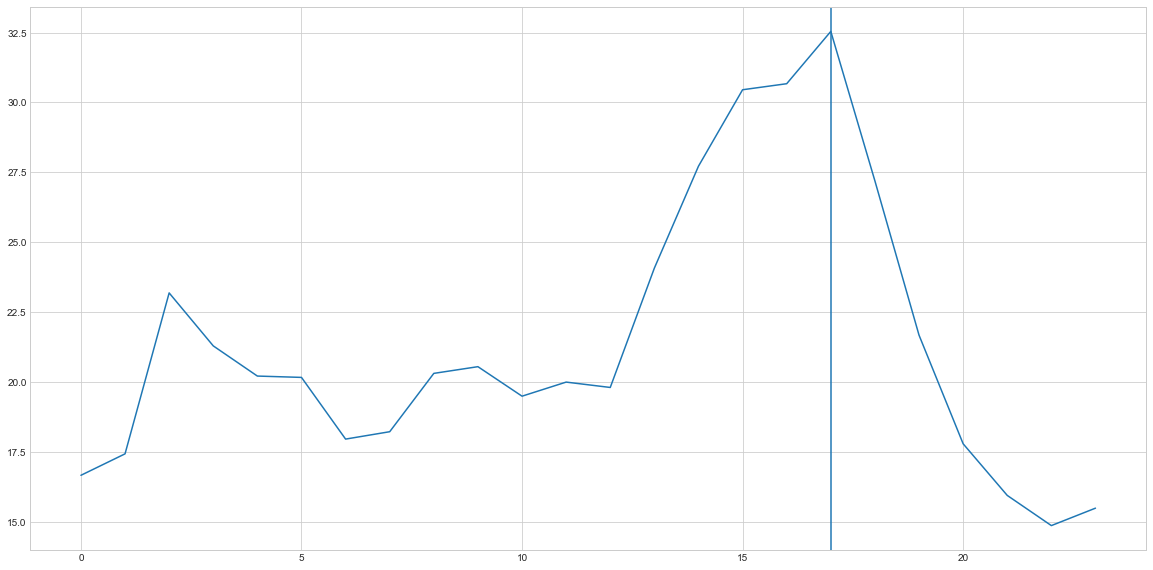

In [52]:

plt.figure(figsize=(20,10))
plt.axvline(x=17)
plt.plot(ConsWith[112+24-16:112+24+8])

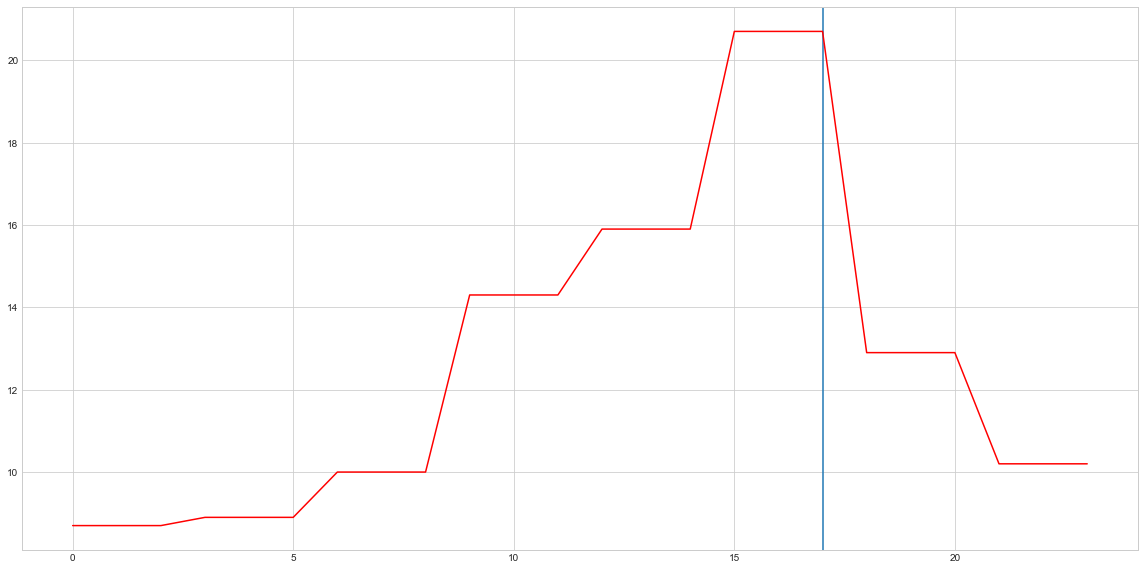

In [53]:
plt.figure(figsize=(20,10))
plt.axvline(x=17)
plt.plot(Temp[112+24-16:112+24+8],'r')

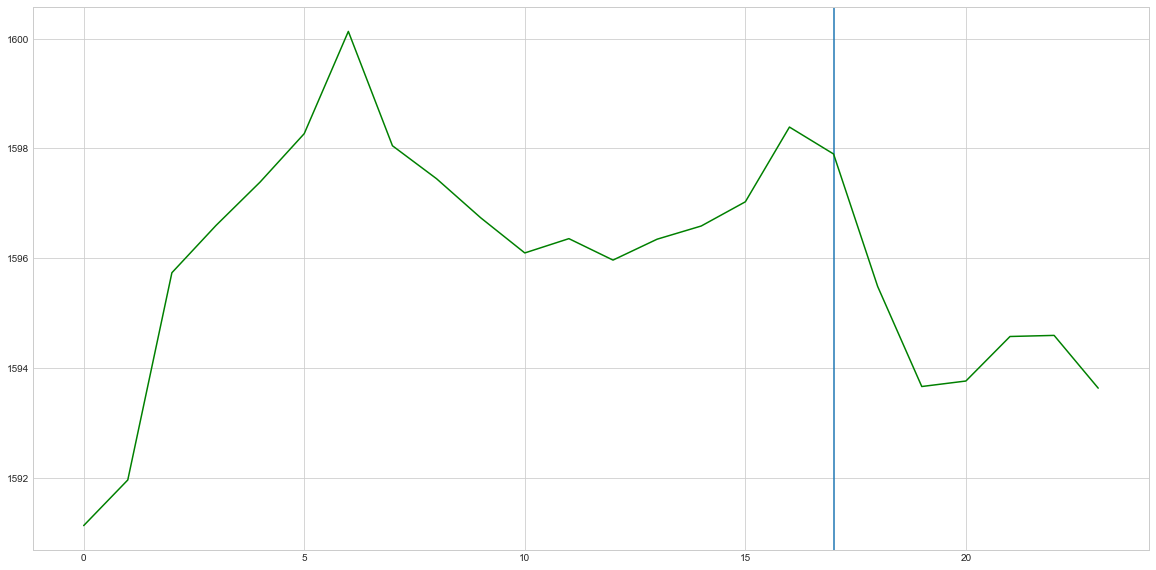

In [54]:
plt.figure(figsize=(20,10))
plt.axvline(x=17)
plt.plot(Stav[112+24-16:112+24+8],'g')

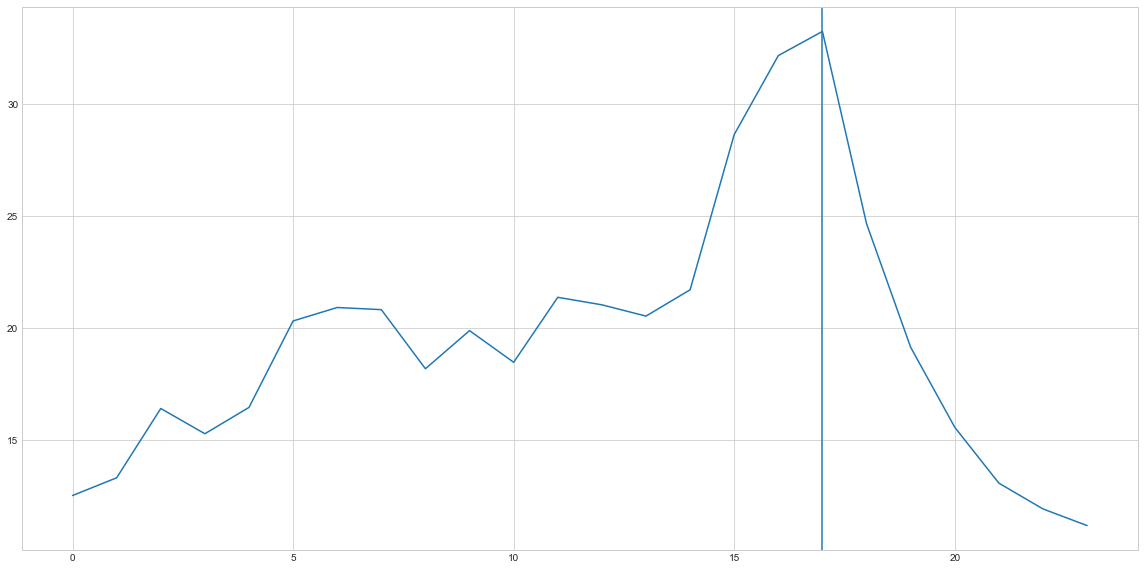

In [55]:

plt.figure(figsize=(20,10))
plt.axvline(x=17)
plt.plot(ConsWith[112+360-16:112+360+8])

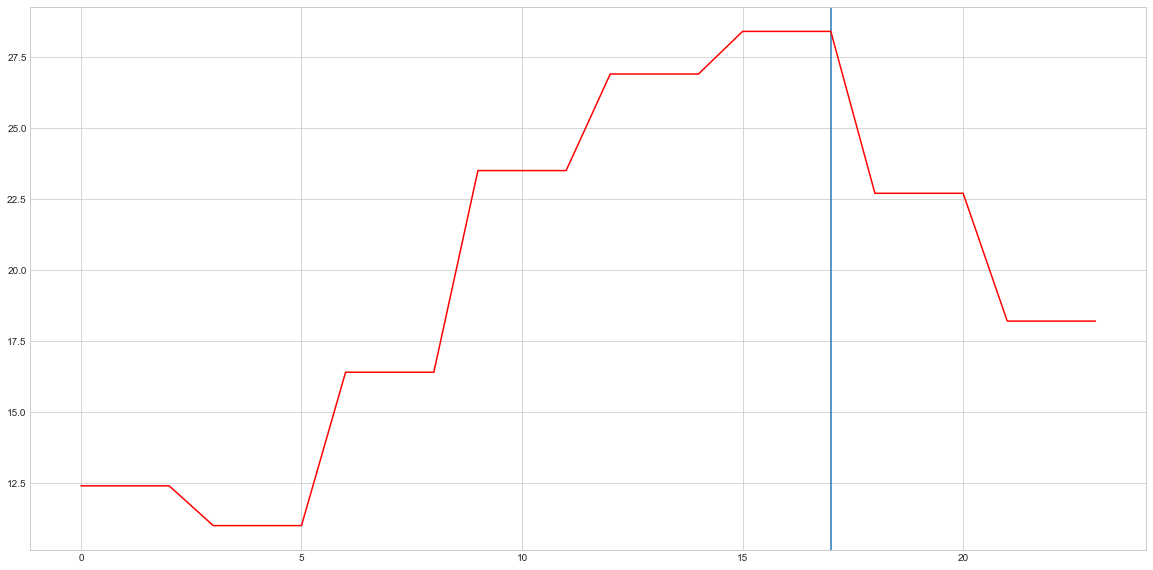

In [56]:
plt.figure(figsize=(20,10))
plt.axvline(x=17)
plt.plot(Temp[112+360-16:112+360+8],'r')

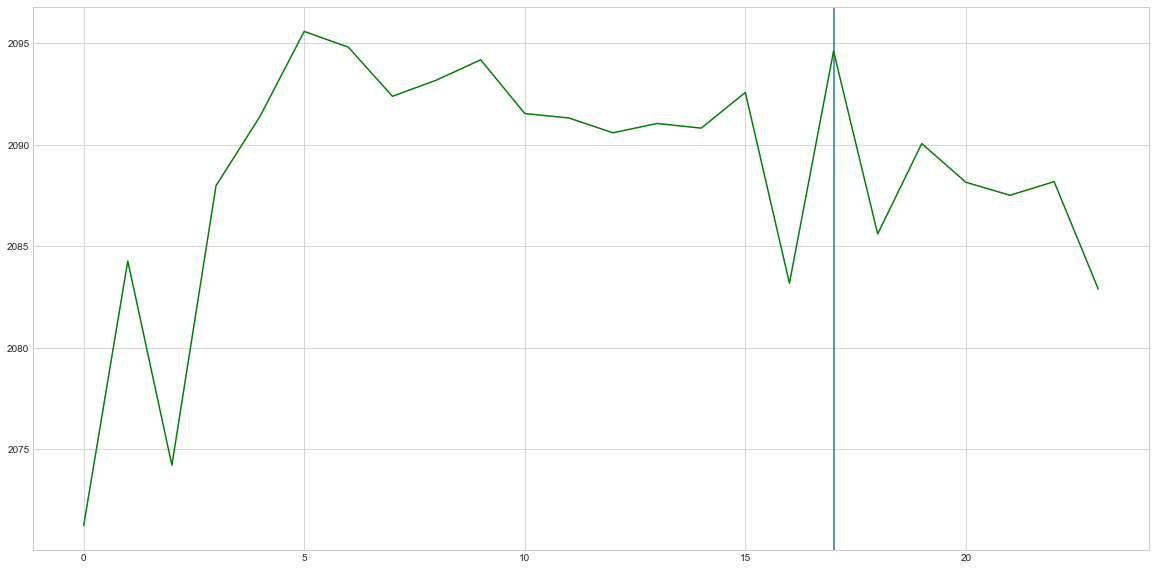

In [57]:
plt.figure(figsize=(20,10))
plt.axvline(x=17)
plt.plot(Stav[112+360-16:112+360+8],'g')

In [58]:
LessStav = [];
for i in range(len(Stav)):
    LessStav.append(Stav[i]/25)

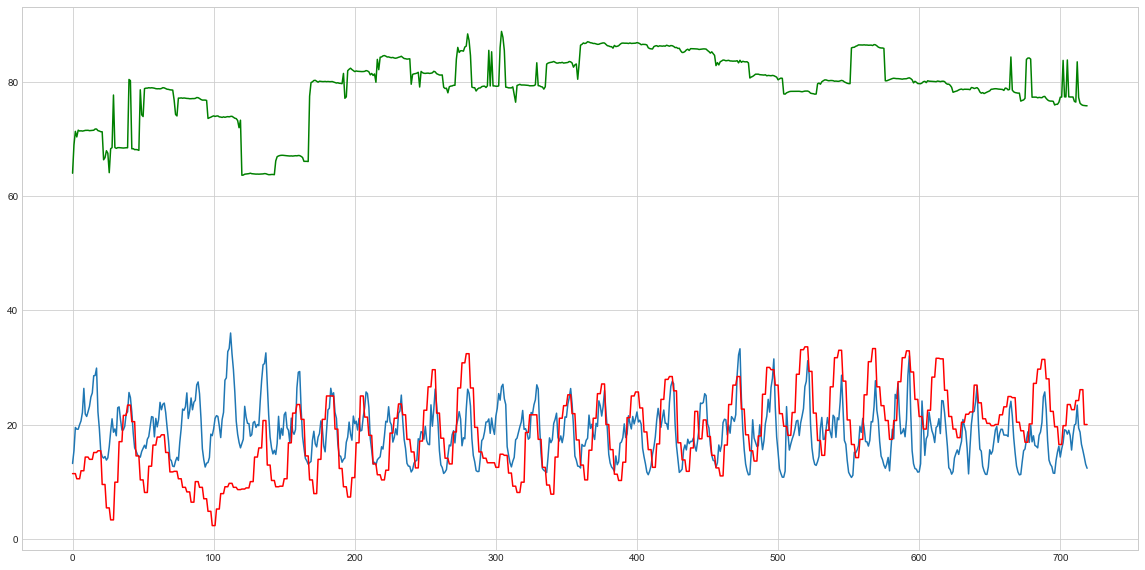

In [59]:
plt.figure(figsize=(20,10))
plt.plot(ConsWith)
plt.plot(Temp,"r")
plt.plot(LessStav,"g")

<h1>Корреляционный анализ
    

In [60]:
#Добавим переменную "Час"
Hour=[]
flag=0;
for i in range(len(df['Ставка'])):
    Hour.append(flag);
    flag+=1;
    if(flag==24):
        flag=0
print(len(Hour))

720


In [61]:
DF = pd.DataFrame({'Data': dat, 'Потребление':ConsWith , "Ставка":Stav,"Температура":Temp,"Время":Hour,"Рабочий/Выходной":WorkOrHolid})
#print(len(dat),len(ConsWith),len(Stav),len(Temp))


In [62]:
DF.columns

Index(['Data', 'Потребление', 'Ставка', 'Температура', 'Время',
       'Рабочий/Выходной'],
      dtype='object')

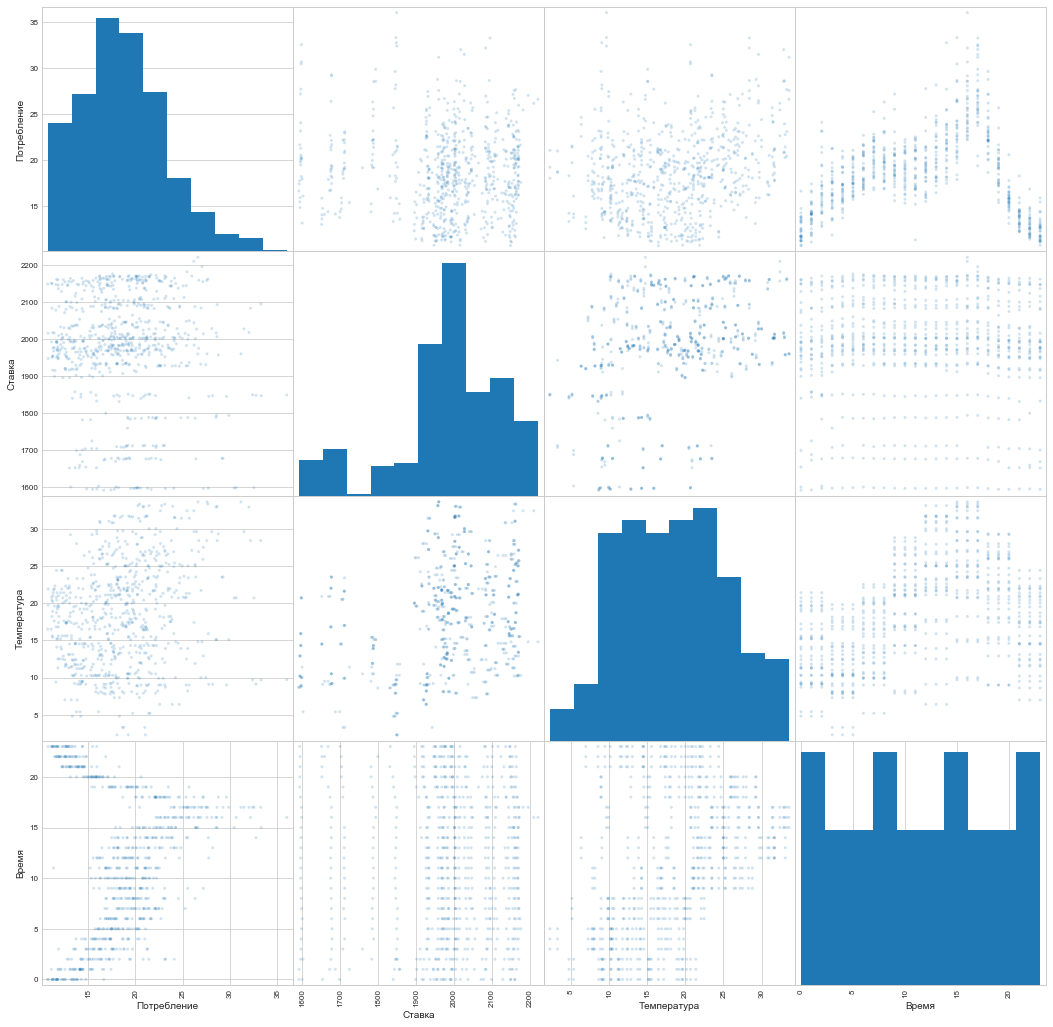

In [63]:
scatter_matrix(DF[['Data', 'Потребление', 'Ставка', 'Температура',"Время"]], figsize=(18,18), alpha=0.2)
plt.show()

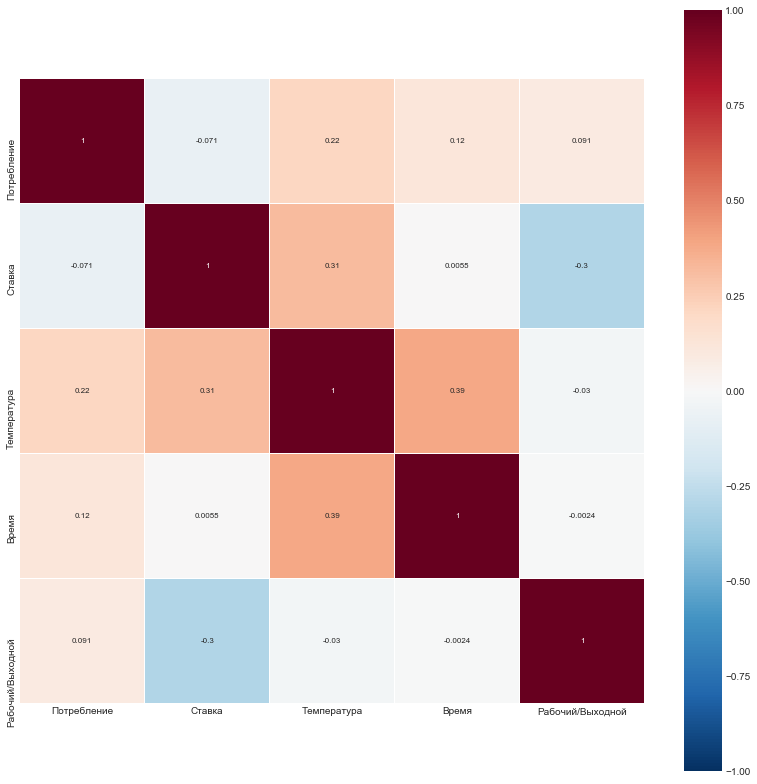

In [64]:
h_map(DF, 0)

In [65]:
col=[ 'Ставка', 'Температура',"Время"]
#Разделим на влияющие и целевую переменную
X=DF[col]
Y=DF['Потребление']

                            OLS Regression Results                            
Dep. Variable:            Потребление   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     17.82
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           3.66e-11
Time:                        15:01:28   Log-Likelihood:                -2078.0
No. Observations:                 720   AIC:                             4164.
Df Residuals:                     716   BIC:                             4182.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.8197      2.291     10.836      

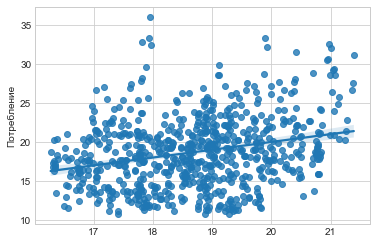

In [66]:
X=sm.add_constant(X)
reg = sm.OLS(Y, X)
res=reg.fit()
print(res.summary())
r=res.predict(X)
r=np.array(res)
sns.regplot(res.fittedvalues.copy(), Y)
plt.show()

<h1>RandomForest

In [67]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import string as string
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [68]:
inputdf = DF.filter(items=[#'Data', 
    'Потребление', 'Ставка', 'Температура',"Время","Рабочий/Выходной"])

In [69]:
features=inputdf
type(features)
#features.iloc[:,5:].head(5)
#features.head(5)
#features.info()
features.columns

Index(['Потребление', 'Ставка', 'Температура', 'Время', 'Рабочий/Выходной'], dtype='object')

In [70]:
# Метки - это значения, которые мы хотим предсказать
labels = np.array(features['Потребление'])
# Удалить ярлыки из функций
# ось 1 относится к столбцам
features= features.drop('Потребление', axis = 1)
# Сохранение имен объектов для последующего использования
feature_list = list(features.columns)
# Преобразовать в массив NumPy
features = np.array(features)

In [71]:
# Использование Scikit-learn для разделения данных на обучающие и тестовые наборы
from sklearn.model_selection import train_test_split
# Разделить данные на обучающие и тестовые наборы
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 100)

print('Форма признаков обучения:', train_features.shape)
print('Форма меток обучения:', train_labels.shape)
print('Форма признаков тестирования:', test_features.shape)
print('Форма меток тестирования:', test_labels.shape)

Форма признаков обучения: (540, 4)
Форма меток обучения: (540,)
Форма признаков тестирования: (180, 4)
Форма меток тестирования: (180,)


In [72]:
# Импортируем используемую модель
from sklearn.ensemble import RandomForestRegressor
# Создание модели с 100 деревьями решений
#rf = RandomForestRegressor(n_estimators = 100, random_state = 100)
rf = RandomForestRegressor(n_estimators = 100, random_state = 100)
# Обучаем модель по выборки обучения
rf.fit(train_features, train_labels);

# Используйте метод прогнозирования леса на тестовых данных
predictions = rf.predict(test_features)
# Рассчитать абсолютные ошибки
errors = abs(predictions - test_labels)
# Вывести среднюю абсолютную ошибку (мАе)
print('Средняя абсолютная ошибка:', round(np.mean(errors), 2), 'кВт.')


# Рассчитать среднюю абсолютную процентную ошибку (MAPE)
mape = 100 * (errors / test_labels)
# Расчет и отображение точности
accuracy = 100 - np.mean(mape)
print('Точность:', round(accuracy, 2), '%.')

Средняя абсолютная ошибка: 1.48 кВт.
Точность: 92.11 %.


In [73]:

# Импорт инструментов, необходимых для визуализации
from sklearn.tree import export_graphviz
#import pydot
# Вытащи одно дерево из леса
tree = rf.estimators_[5]

# Получить числовые значения функций
importances = list(rf.feature_importances_)
# Список кортежей с переменной и важностью
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# # Сортировать значения функций по наиболее важным
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Распечатать функцию и значение
[print('Переменные: {:20} Важность: {}'.format(*pair)) for pair in feature_importances];

Переменные: Время                Важность: 0.76
Переменные: Ставка               Важность: 0.11
Переменные: Температура          Важность: 0.11
Переменные: Рабочий/Выходной     Важность: 0.02


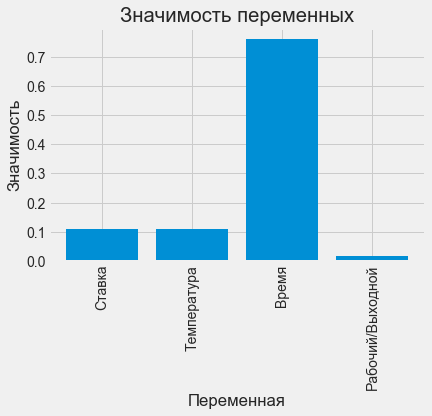

In [74]:
#%matplotlib inline
# Установить стиль
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Сделать гистограмму
plt.bar(x_values, importances, orientation = 'vertical')
# Галочки меток для оси x
plt.xticks(x_values, feature_list, rotation='vertical')
# Оси метки и заголовок
plt.ylabel('Значимость'); plt.xlabel('Переменная'); plt.title('Значимость переменных');
plt.show()

In [75]:
# Обучаем новуюю модель Случайного леса с двумя самыми важными переменными
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=1000)
# Извлечь два самых важных признака 
important_indices = [feature_list.index('Ставка'), feature_list.index('Время')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Обучить Случайный лес
rf_most_important.fit(train_important, train_labels)
# Делать прогнозы и определять ошибку
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Показать показатели производительности
print('Средняя абсолютная ошибка:', round(np.mean(errors), 2), 'кВт.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Точность:', round(accuracy, 2), '%.')

Средняя абсолютная ошибка: 1.63 кВт.
Точность: 91.25 %.


<h1>Анализ выходных

In [76]:
ConsWEnd = [];
StavWend = [];


#FirstWeek = ConsWith[0:47];
CWeekendsFirstWeek = ConsWith[48:97];
SWeekendsFirstWeek = Stav[48:97];
#SecondWeek = ConsWith[96:216];
CWeekendsSecondWeek = ConsWith[217:263];
SWeekendsSecondWeek = Stav[217:263];
#ThirdWeek = ConsWith[264:384];
CWeekendsThirdWeek = ConsWith[385:431];
SWeekendsThirdWeek = Stav[385:431];
#FourWeek = ConsWith[432:552];
CWeekendsFourWeek = ConsWith[553:599];
SWeekendsFourWeek = Stav[553:599];

StavWend = SWeekendsFirstWeek + SWeekendsSecondWeek + SWeekendsThirdWeek + SWeekendsFourWeek;
ConsWEnd = CWeekendsFirstWeek + CWeekendsSecondWeek + CWeekendsThirdWeek + CWeekendsFourWeek;

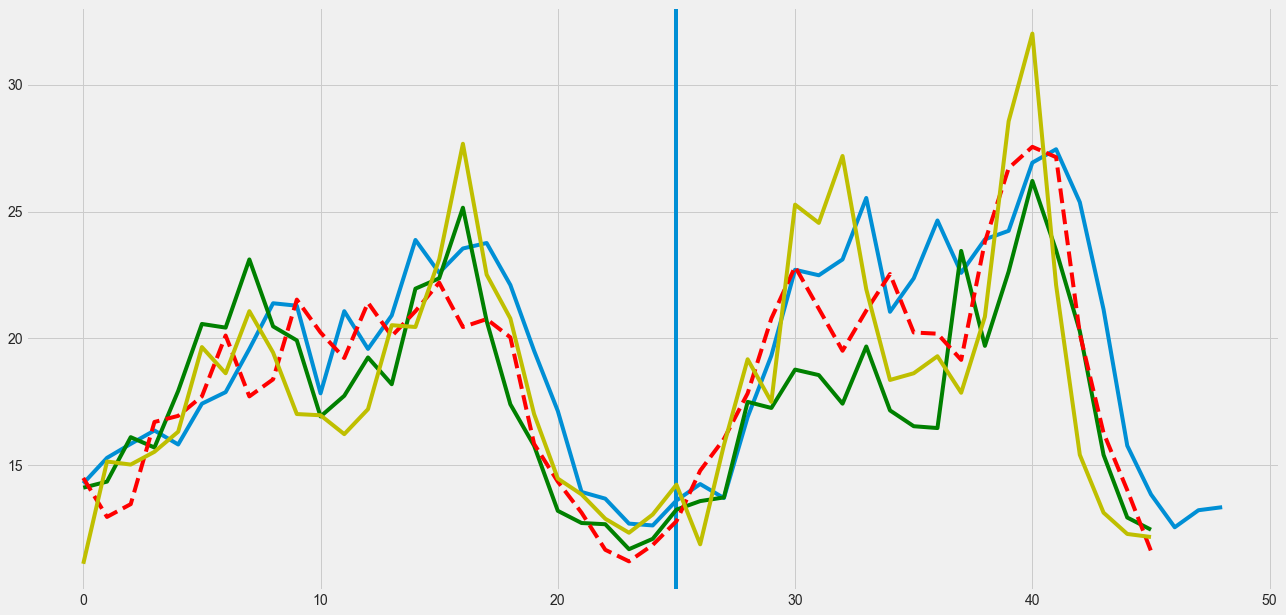

In [77]:
plt.figure(figsize=(20,10))
plt.axvline(x=25)

plt.plot(CWeekendsFirstWeek)
plt.plot(CWeekendsSecondWeek,'g')
plt.plot(CWeekendsThirdWeek,'--r')
plt.plot(CWeekendsFourWeek,'y')

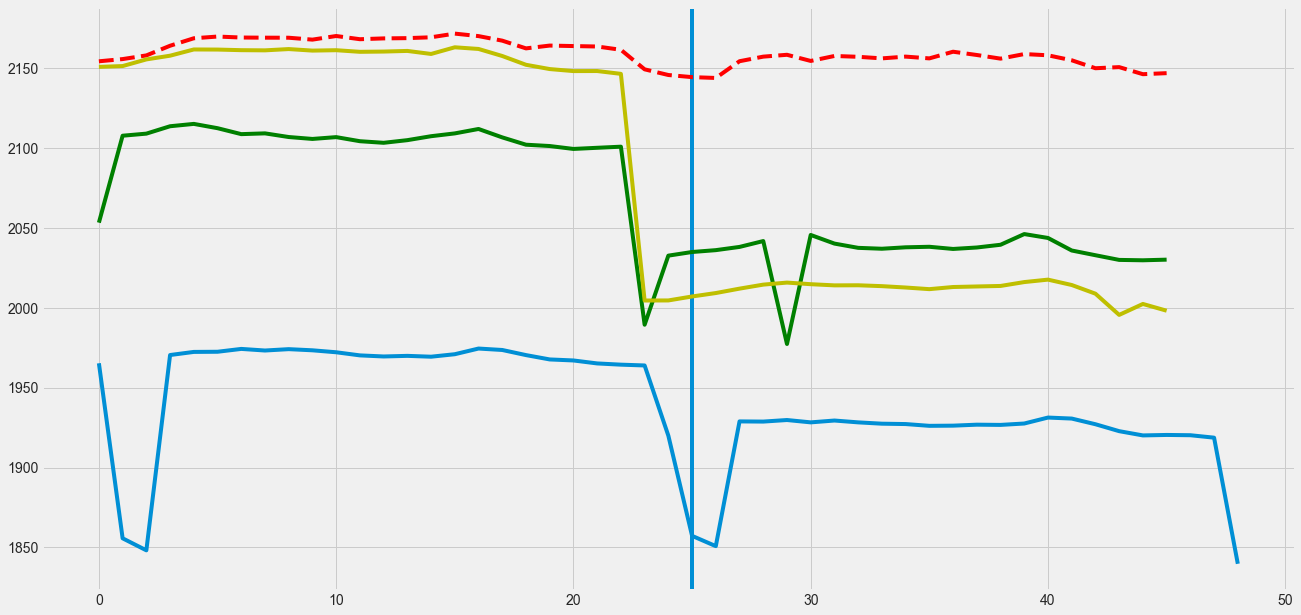

In [78]:
plt.figure(figsize=(20,10))
plt.axvline(x=25)

plt.plot(SWeekendsFirstWeek)
plt.plot(SWeekendsSecondWeek,'g')
plt.plot(SWeekendsThirdWeek,'--r')
plt.plot(SWeekendsFourWeek,'y')

In [79]:
print(df[264:288])

                       t  Потребл.эн   Ставка
Data                                         
2017-06-12 00:00:00  265      11.688  1970.82
2017-06-12 01:00:00  266      12.120  1972.23
2017-06-12 02:00:00  267      14.520  1951.99
2017-06-12 03:00:00  268      16.416  1978.52
2017-06-12 04:00:00  269      16.248  1981.35
2017-06-12 05:00:00  270      18.192  1982.26
2017-06-12 06:00:00  271      18.912  1984.99
2017-06-12 07:00:00  272      16.776  1985.05
2017-06-12 08:00:00  273      19.824  2099.10
2017-06-12 09:00:00  274      20.784  2150.85
2017-06-12 10:00:00  275      22.248  2128.86
2017-06-12 11:00:00  276      20.952  2136.25
2017-06-12 12:00:00  277      16.272  2136.33
2017-06-12 13:00:00  278      17.688  2134.37
2017-06-12 14:00:00  279      17.496  2152.36
2017-06-12 15:00:00  280      22.656  2156.60
2017-06-12 16:00:00  281      26.184  2209.94
2017-06-12 17:00:00  282      25.464  2181.65
2017-06-12 18:00:00  283      23.256  2115.57
2017-06-12 19:00:00  284      17.5

<h1> Holiday

In [80]:
HolidayCons = ConsWith[264:288]
HolidayStav = Stav[264:288]


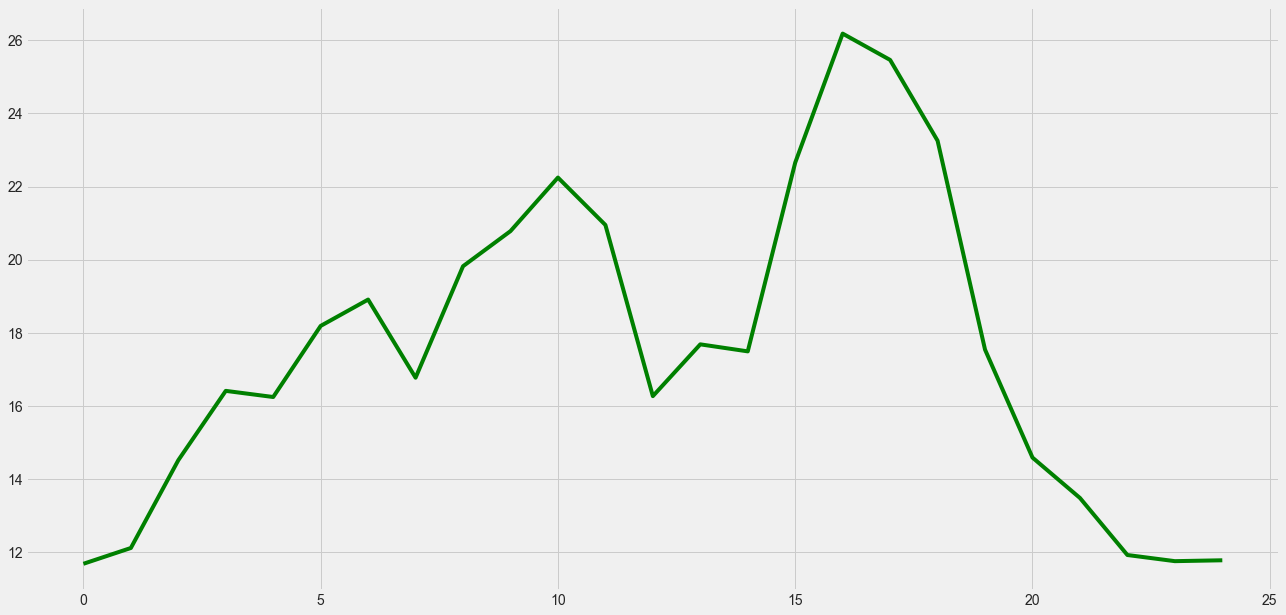

In [81]:
plt.figure(figsize=(20,10))
plt.plot(ThirdWeekM,'g')


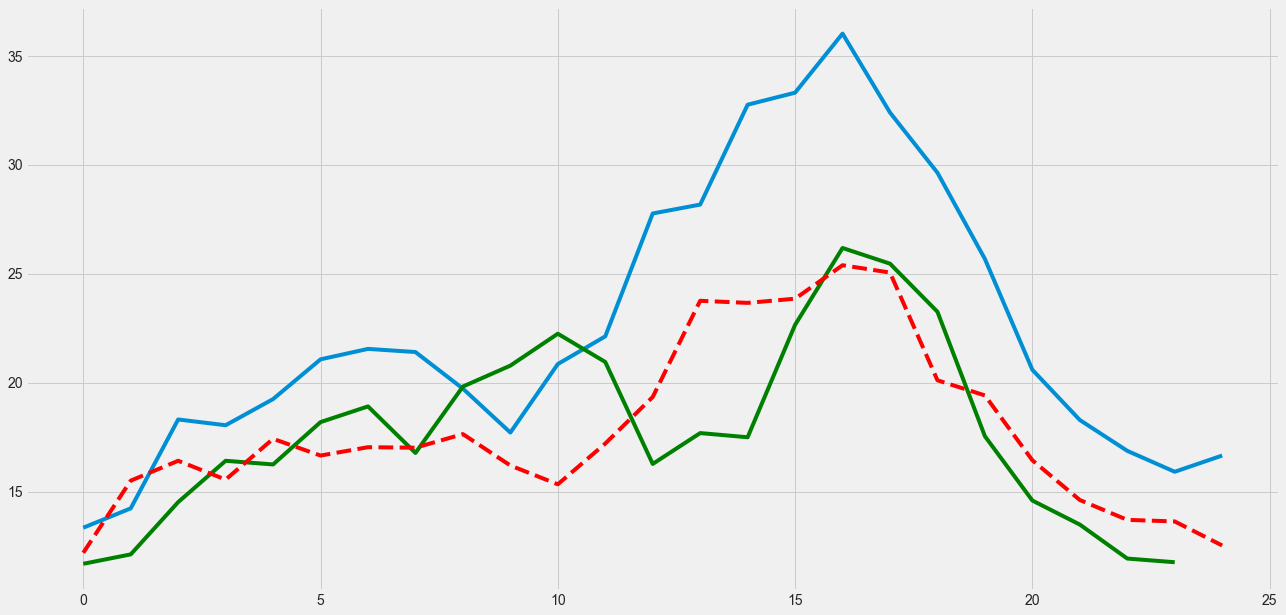

In [82]:
plt.figure(figsize=(20,10))

plt.plot(SecondWeekM)
plt.plot(HolidayCons,'g')
plt.plot(FourWeekM,'--r')

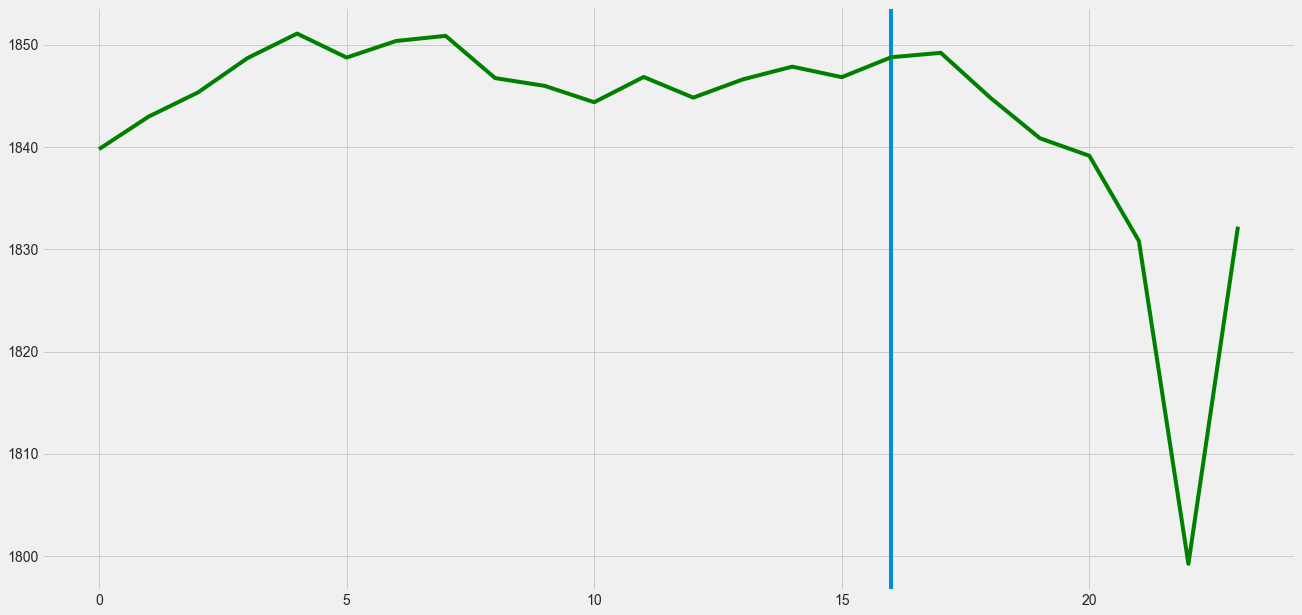

In [83]:
plt.figure(figsize=(20,10))
plt.axvline(x=16)
plt.plot(Stav[112-16:112+8],'g')

In [84]:

FirstWeek = ConsWith[0:47];
WeekendsFirstWeek = Cons[48:97];
SecondWeek = ConsWith[96:216];
WeekendsSecondWeek = Cons[217:263];
ThirdWeek = ConsWith[264:384];
WeekendsThirdWeek = Cons[385:431];
FourWeek = ConsWith[432:552];
WeekendsFourWeek = Cons[553:559];
LastWeek = ConsWith[600:720];

M = [];
T = [];
W = [];
Th = [];
F = [];
Sa = [];
Su = [];


One = [];
Two = [];
Three = [];
Four = [];
Five = [];
Six = [];
Seven = [];
Eight = [];
Nine = [];
Ten = [];
Eleven = [];
Twelve = [];
Thirteen = [];
Fourteen = [];
Fifteen = [];
Sixteen = [];
Seventeen = [];
Eighteen = [];
Nineteen = [];
Twenty=[];
TwentyOne=[];
TwentyTwo = [];
TwentyThree = [];
TwentyFour =[];


print(data[0].year)   

2017


In [85]:
%run WeekDay&&HourInDay.py
def weekDay(year, month, day):
    offset = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
    week   = ['Sunday', 
              'Monday', 
              'Tuesday', 
              'Wednesday', 
              'Thursday',  
              'Friday', 
              'Saturday']
    afterFeb = 1
    if month > 2: afterFeb = 0
    aux = year - 1700 - afterFeb
    # dayOfWeek for 1700/1/1 = 5, Friday
    dayOfWeek  = 5
    # partial sum of days betweem current date and 1700/1/1
    dayOfWeek += (aux + afterFeb) * 365                  
    # leap year correction    
    dayOfWeek += aux / 4 - aux / 100 + (aux + 100) / 400     
    # sum monthly and day offsets
    dayOfWeek += offset[month - 1] + (day - 1)               
    dayOfWeek %= 7
    return dayOfWeek

<Figure size 432x288 with 0 Axes>

In [86]:

for i in range(len(df["Ставка"])):
    #print(i)
    Day = weekDay(int(data[i].year), int(data[i].month), int(data[i].day));
    print(int(Day))
    if int(Day) == 1:
        M.append(1)
        T.append(0)
        W.append(0)
        Th.append(0)
        F.append(0)
        Sa.append(0)
        Su.append(0)
    if int(Day) == 2:
        M.append(0)
        T.append(1)
        W.append(0)
        Th.append(0)
        F.append(0)
        Sa.append(0)
        Su.append(0)
    if int(Day) == 3:
        M.append(0)
        T.append(0)
        W.append(1)
        Th.append(0)
        F.append(0)
        Sa.append(0)
        Su.append(0)
    if int(Day) == 4:
        M.append(0)
        T.append(0)
        W.append(0)
        Th.append(1)
        F.append(0)
        Sa.append(0)
        Su.append(0)
    if int(Day) == 5:
        M.append(0)
        T.append(0)
        W.append(0)
        Th.append(0)
        F.append(1)
        Sa.append(0)
        Su.append(0)
    if int(Day) == 6:
        M.append(0)
        T.append(0)
        W.append(0)
        Th.append(0)
        F.append(0)
        Sa.append(1)
        Su.append(0)
    if int(Day) == 0:
        M.append(0)
        T.append(0)
        W.append(0)
        Th.append(0)
        F.append(0)
        Sa.append(0)
        Su.append(1)
#print(len(M))          

    

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [87]:
HourInDay = {
'0' : [],
'1' : [],
'2' :[],
'3' : [],
'4' : [],
'5' : [],
'6' : [],
'7' : [],
'8' : [],
'9' : [],
'10' : [],
'11' : [],
'12':[],
'13' : [],
'14' : [],
'15' : [],
'16' : [],
'17' : [],
'18' :[],
'19' : [],
'20' :[],
'21' :[],
'22' : [],
'23' : []
#'24 ' : [];
}
for i in Hour:
    for key in HourInDay:
        #print(key,"=",i)
        if int(i) == int(key):
            #print(key)
            HourInDay[key].append(1)
        else:
             HourInDay[key].append(0)
print(len(HourInDay['1']));
        


720


In [88]:
TempSquare = [];
Trend = [];

for i in range(len(df["Ставка"])):
    TempSquare.append(Temp[i]*Temp[i]);
    Trend.append(i);
print(Temp[1],TempSquare[1])

11.4 129.96


In [97]:
#Долгота
Long=pd.read_excel("LongSummerValid.xlsx")
Long.head()

,Unnamed: 0,Long
0,0,986.433333
1,1,986.433333
2,2,986.433333
3,3,986.433333
4,4,986.433333


In [122]:
# инструментальная переменная  для ставки(Скользящее средние для ставки)
DfStav = pd.DataFrame({'Stav': Stav})


# Tail-rolling average transform
rolling = DfStav.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
#DfStav.plot()
#rolling_mean.plot(color='red')
print(len(rolling_mean))
rolling_mean["Stav"][0]=1748;
rolling_mean["Stav"][1]=1754

          Stav
0          NaN
1          NaN
2  1702.573333
3  1755.530000
4  1776.910000
5  1777.393333
6  1786.333333
7  1785.023333
8  1785.336667
9  1785.950000
720


In [123]:
df = pd.DataFrame({'Data': data, 
                   'Потребление':ConsWith , 
                   "Ставка":Stav,
                   "Температура":Temp,
                   #"Время":Hour,
                   "Рабочий/Выходной":WorkOrHolid,
                   "КвадратТемпературы":TempSquare,
                   "Тренд":Trend,
                   "Долгота":[i for i in Long['Long']],
                   "КвадратДолготы":[i*i for i in Long['Long']],
                   "Ставка(t-1)":[i for i in rolling_mean['Stav']],
'0':[i for i in HourInDay["0"]],
'1' :[i for i in HourInDay["1"]],
'2' :[i for i in HourInDay["2"]],
'3' :[i for i in HourInDay["3"]],
'4' :[i for i in HourInDay["4"]],
'5' :[i for i in HourInDay["5"]],
'6' :[i for i in HourInDay["6"]],
'7' :[i for i in HourInDay["7"]],
'8' :[i for i in HourInDay["8"]],
'9' :[i for i in HourInDay["9"]],
'10' :[i for i in HourInDay["10"]],
'11' :[i for i in HourInDay["11"]],
'12' :[i for i in HourInDay["12"]],
'13' :[i for i in HourInDay["13"]],
'14' :[i for i in HourInDay["14"]],
'15' :[i for i in HourInDay["15"]],
'16' :[i for i in HourInDay["16"]],
'17' :[i for i in HourInDay["17"]],
'18' :[i for i in HourInDay["18"]],
'19' :[i for i in HourInDay["19"]],
'20' :[i for i in HourInDay["20"]],
'21' :[i for i in HourInDay["21"]],
'22' :[i for i in HourInDay["22"]],
'23' :[i for i in HourInDay["23"]],
'M':M,
'T':T,
'W':W,
'Th':Th,
'F':F,
'Sa':Sa,
'Su':Su
                  })
                   
df

,Data,Потребление,Ставка,Температура,Рабочий/Выходной,КвадратТемпературы,Тренд,Долгота,КвадратДолготы,Ставка(t-1),...,21,22,23,M,T,W,Th,F,Sa,Su
0,2017-06-01 00:00:00,13.176,1600.03,11.4,1,129.96,0,986.433333,9.730507e+05,1748.000000,...,0,0,0,0,0,0,1,0,0,0
1,2017-06-01 01:00:00,15.408,1724.33,11.4,1,129.96,1,986.433333,9.730507e+05,1754.000000,...,0,0,0,0,0,0,1,0,0,0
2,2017-06-01 02:00:00,19.488,1783.36,11.4,1,129.96,2,986.433333,9.730507e+05,1702.573333,...,0,0,0,0,0,0,1,0,0,0
3,2017-06-01 03:00:00,19.176,1758.90,10.5,1,110.25,3,986.433333,9.730507e+05,1755.530000,...,0,0,0,0,0,0,1,0,0,0
4,2017-06-01 04:00:00,19.176,1788.47,10.5,1,110.25,4,986.433333,9.730507e+05,1776.910000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2017-06-30 19:00:00,16.536,1900.47,26.1,0,681.21,715,1003.800000,1.007614e+06,1913.020000,...,0,0,0,0,0,0,0,1,0,0
716,2017-06-30 20:00:00,15.480,1897.20,26.1,0,681.21,716,1003.800000,1.007614e+06,1901.466667,...,0,0,0,0,0,0,0,1,0,0
717,2017-06-30 21:00:00,14.304,1896.25,20.0,0,400.00,717,1003.800000,1.007614e+06,1897.973333,...,1,0,0,0,0,0,0,1,0,0
718,2017-06-30 22:00:00,13.032,1895.57,20.0,0,400.00,718,1003.800000,1.007614e+06,1896.340000,...,0,1,0,0,0,0,0,1,0,0


In [124]:
df.columns

Index(['Data', 'Потребление', 'Ставка', 'Температура', 'Рабочий/Выходной',
       'КвадратТемпературы', 'Тренд', 'Долгота', 'КвадратДолготы',
       'Ставка(t-1)', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', 'M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'],
      dtype='object')

In [125]:
col=[#'Data', 'Потребление', 
     'Ставка', 'Температура', 'Рабочий/Выходной',
       'КвадратТемпературы', 'Тренд', 'Долгота', 'КвадратДолготы',
       'Ставка(t-1)', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', 'M', 'T', 'W', 'Th', 'F', 'Sa', 'Su']
#Разделим на влияющие и целевую переменную
X=df[col]
Y=df['Потребление']

In [126]:
X=sm.add_constant(X)


model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Потребление   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     79.60
Date:                Wed, 02 Sep 2020   Prob (F-statistic):          1.89e-220
Time:                        15:35:05   Log-Likelihood:                -1502.3
No. Observations:                 720   AIC:                             3081.
Df Residuals:                     682   BIC:                             3255.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9488.8667   2052

In [127]:
#res=get_factors(df, Y, col)

In [128]:
glsar_model = sm.GLSAR(Y, X, 1)
glsar_results = glsar_model.iterative_fit(1)
print(glsar_results.summary())

                           GLSAR Regression Results                           
Dep. Variable:            Потребление   R-squared:                       0.812
Model:                          GLSAR   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     79.31
Date:                Wed, 02 Sep 2020   Prob (F-statistic):          7.88e-220
Time:                        15:35:09   Log-Likelihood:                -1500.6
No. Observations:                 719   AIC:                             3077.
Df Residuals:                     681   BIC:                             3251.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9557.8419   2059

In [113]:
#Recursive least squares

#mod = sm.RecursiveLS(Y, X)
#res = mod.fit()

#print(res.summary())

In [114]:
huber_t = sm.RLM(Y, X, M=sm.robust.norms.HuberT())
hub_results = huber_t.fit()
print(hub_results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:            Потребление   No. Observations:                  720
Model:                            RLM   Df Residuals:                      682
Method:                          IRLS   Df Model:                           37
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 02 Sep 2020                                         
Time:                        15:29:50                                         
No. Iterations:                    50                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               8301.5415   1788